## Tracks ripple participation probability over epochs

In [1]:
# %cd ..
sys.path.append(r'D:\github\ripple_heterogeneity\python')

import pandas as pd
import numpy as np 
import glob
import matplotlib.pyplot as plt

import sys,os
import seaborn as sns

import functions,loading
import ripple_participation_run

import nelpy as nel  # main nelpy imports

import math
import itertools
from scipy import stats
import multiprocessing
from joblib import Parallel, delayed
from scipy.ndimage import gaussian_filter1d
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RANSACRegressor
import matplotlib
from matplotlib.ticker import AutoMinorLocator


C:\Users\Cornell\anaconda3\envs\ripple_diversity\lib\site-packages\nelpy\plotting\decoding.py:9: MatplotlibDeprecationWarning: 
The mpl_toolkits.axes_grid module was deprecated in Matplotlib 2.1 and will be removed two minor releases later. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist, which provide the same functionality instead.


In [2]:
functions.set_plotting_defaults()

%config InlineBackend.figure_format = 'retina'

fig_save_path = r'Z:\home\ryanh\projects\ripple_heterogeneity\figures\panels'

## run analysis

In [63]:
df = pd.read_csv(r'Z:\home\ryanh\projects\ripple_heterogeneity\sessions.csv')
save_path = r'Z:\home\ryanh\projects\ripple_heterogeneity\ripple_stability'

# these datasets don't have multiple mazes in the same session (as far as I know)
# not_to_use = (
#             (df['basepath'].str.contains("GirardeauG", case=False)) |
#             (df['basepath'].str.contains("ORproject", case=False)) |
#             (df['basepath'].str.contains("OMLproject", case=False)) |
#             (df['basepath'].str.contains("GrosmarkAD", case=False))
#             )
not_to_use = (
            (df['basepath'].str.contains("GirardeauG", case=False)) |
            (df['basepath'].str.contains("ORproject", case=False))
            )
df = df.loc[~not_to_use]

ripple_participation_run.participation_run(df,save_path,parallel=False)

Z:\Data\AYAold\AB1\day1
Z:\Data\AYAold\AB3\AB3_38_41
Z:\Data\AYAold\AB3\AB3_42_46
Z:\Data\AYAold\AB3\AB3_47_49
Z:\Data\AYAold\AB3\AB3_50_51
Z:\Data\AYAold\AB3\AB3_55_57
Z:\Data\AYAold\AB3\AB3_58_59
Z:\Data\AYAold\AB3\AB3_60
Z:\Data\AYAold\AB4\day03
Z:\Data\AYAold\AB4\day07
Z:\Data\AYAold\AB4\day08
Z:\Data\AYAold\AB4\day09
Z:\Data\AYAold\AB4\day11
Z:\Data\AYAold\AYA10\day25
Z:\Data\AYAold\AYA10\day27
Z:\Data\AYAold\AYA10\day31
Z:\Data\AYAold\AYA10\day32
Z:\Data\AYAold\AYA10\day34
Z:\Data\AYAold\AYA4\day150726
Z:\Data\AYAold\AYA4\day150728
Z:\Data\AYAold\AYA4\day150804
Z:\Data\AYAold\AYA6\day17
Z:\Data\AYAold\AYA6\day19
Z:\Data\AYAold\AYA6\day20
Z:\Data\AYAold\AYA7\day19
Z:\Data\AYAold\AYA7\day20
Z:\Data\AYAold\AYA7\day22
Z:\Data\AYAold\AYA7\day24
Z:\Data\AYAold\AYA7\day25
Z:\Data\AYAold\AYA7\day27
Z:\Data\AYAold\AYA7\day30
Z:\Data\AYAold\AYA9\day12
Z:\Data\AYAold\AYA9\day15
Z:\Data\AYAold\AYA9\day16
Z:\Data\AYAold\AYA9\day17
Z:\Data\AYAold\AYA9\day20
Z:\Data\GrosmarkAD\Achilles\Achilles

KeyboardInterrupt: 

In [8]:
# df = pd.read_csv(r'Z:\home\ryanh\projects\ripple_heterogeneity\sessions.csv')

# big_epoch_df = pd.DataFrame()

# for basepath in df.basepath.unique():
#     # temp_df = loading.load_epoch(basepath)

#     try:
#         temp_df = loading.load_epoch(basepath)
#     except:
#         print(basepath)
#         temp_df = loading.load_epoch(basepath)

#         break
#     temp_df['basepath'] = basepath
#     big_epoch_df = big_epoch_df.append(temp_df,ignore_index=True)

In [9]:
# for basepath in big_epoch_df.basepath.unique():
#     big_epoch_df.loc[big_epoch_df.basepath == basepath,'n_epochs'] = big_epoch_df[big_epoch_df.basepath == basepath].shape[0]
# big_epoch_df[(big_epoch_df.n_epochs > 3) & (~big_epoch_df['basepath'].str.contains("GirardeauG", case=False))].basepath.unique()

# Load saved data

In [4]:
def load_in_everything(save_path):
    
    sessions = glob.glob(save_path + os.sep + '*.csv')
    
    results = pd.DataFrame()
    
    for session in sessions:
        df1 = pd.read_csv(session)
        results = results.append(df1,ignore_index=True)
    return results

# load data from savepath
df = load_in_everything(save_path)

# restrict to units with >=25 spikes per epoch

In [5]:
# restrict to units with >=25 spikes per epoch
for basepath in df.basepath.unique():
    good = []
    for ep in df[df.basepath == basepath].epoch_n.unique():
        good.append(df[(df.basepath == basepath) & (df.epoch_n==ep)].n_spikes >= 25)

    idx = np.vstack(good).sum(axis=0) == df[(df.basepath == basepath)].epoch_n.unique().shape[0]
    idx = np.hstack([idx]*df[(df.basepath == basepath)].epoch_n.unique().shape[0])
    df.loc[df.basepath == basepath, 'unit_quality'] = idx
df = df[df.unit_quality]
df

Unnamed: 0  UID                  basepath  epoch  epoch_n  familiarity  \
0               0    1   Z:\Data\AYAold\AB1\day1  sleep        0          1.0   
1               1    2   Z:\Data\AYAold\AB1\day1  sleep        0          1.0   
2               2    9   Z:\Data\AYAold\AB1\day1  sleep        0          1.0   
3               3   10   Z:\Data\AYAold\AB1\day1  sleep        0          1.0   
4               4   12   Z:\Data\AYAold\AB1\day1  sleep        0          1.0   
...           ...  ...                       ...    ...      ...          ...   
11896          58   29  Z:\Data\Kenji\nlx_070329  sleep        2         10.0   
11897          59   31  Z:\Data\Kenji\nlx_070329  sleep        2         10.0   
11898          60   32  Z:\Data\Kenji\nlx_070329  sleep        2         10.0   
11899          61   35  Z:\Data\Kenji\nlx_070329  sleep        2         10.0   
11900          62   41  Z:\Data\Kenji\nlx_070329  sleep        2         10.0   

      deepSuperficial brainRegion putativeCellType  participation_prob  \
0                Deep         CA1   Pyramidal Cell            0.008518   
1         Superficial         CA1   Pyramidal Cell            0.015332   
2                Deep         CA1   Pyramidal Cell            0.126065   
3         Superficial         CA1   Pyramidal Cell            0.039182   
4                Deep         CA1   Pyramidal Cell            0.766610   
...               ...         ...              ...                 ...   
11896            Deep         CA1   Pyramidal Cell            0.077071   
11897            Deep         CA1   Pyramidal Cell            0.066334   
11898            Deep         CA1   Pyramidal Cell            0.024732   
11899            Deep         CA1   Pyramidal Cell            0.046012   
11900            Deep         CA1   Pyramidal Cell            0.015913   

       avg_fr_not_rip  avg_fr_in_rip  n_spikes  session_dur  n_ripples  \
0            0.021722       0.142346      29.0    1139.9992        587   
1            0.044349       0.256223      58.0    1139.9992        587   
2            0.230796       2.590703     346.0    1139.9992        587   
3            0.264284       0.683262     316.0    1139.9992        587   
4            9.884389      39.401462   12305.0    1139.9992        587   
...               ...            ...       ...          ...        ...   
11896        0.375055       1.571962    6249.0   15573.4079       5216   
11897        0.134450       1.384265    2520.0   15573.4079       5216   
11898        0.193009       0.436982    3089.0   15573.4079       5216   
11899        0.089808       0.985409    1704.0   15573.4079       5216   
11900        0.046152       0.419385     846.0   15573.4079       5216   

      unit_quality  
0             True  
1             True  
2             True  
3             True  
4             True  
...            ...  
11896         True  
11897         True  
11898         True  
11899         True  
11900         True  

[10024 rows x 16 columns]

# Keep sessions with >= 25 ripples

In [6]:
# restrict to units with >=25 ripples per epoch
for basepath in df.basepath.unique():
    good = []
    for ep in df[df.basepath == basepath].epoch_n.unique():
        good.append(df[(df.basepath == basepath) & (df.epoch_n==ep)].n_ripples >= 25)

    idx = np.vstack(good).sum(axis=0) == df[(df.basepath == basepath)].epoch_n.unique().shape[0]
    idx = np.hstack([idx]*df[(df.basepath == basepath)].epoch_n.unique().shape[0])
    df.loc[df.basepath == basepath, 'epoch_quality'] = idx
df = df[df.epoch_quality]
df

Unnamed: 0  UID                  basepath  epoch  epoch_n  familiarity  \
0               0    1   Z:\Data\AYAold\AB1\day1  sleep        0          1.0   
1               1    2   Z:\Data\AYAold\AB1\day1  sleep        0          1.0   
2               2    9   Z:\Data\AYAold\AB1\day1  sleep        0          1.0   
3               3   10   Z:\Data\AYAold\AB1\day1  sleep        0          1.0   
4               4   12   Z:\Data\AYAold\AB1\day1  sleep        0          1.0   
...           ...  ...                       ...    ...      ...          ...   
11896          58   29  Z:\Data\Kenji\nlx_070329  sleep        2         10.0   
11897          59   31  Z:\Data\Kenji\nlx_070329  sleep        2         10.0   
11898          60   32  Z:\Data\Kenji\nlx_070329  sleep        2         10.0   
11899          61   35  Z:\Data\Kenji\nlx_070329  sleep        2         10.0   
11900          62   41  Z:\Data\Kenji\nlx_070329  sleep        2         10.0   

      deepSuperficial brainRegion putativeCellType  participation_prob  \
0                Deep         CA1   Pyramidal Cell            0.008518   
1         Superficial         CA1   Pyramidal Cell            0.015332   
2                Deep         CA1   Pyramidal Cell            0.126065   
3         Superficial         CA1   Pyramidal Cell            0.039182   
4                Deep         CA1   Pyramidal Cell            0.766610   
...               ...         ...              ...                 ...   
11896            Deep         CA1   Pyramidal Cell            0.077071   
11897            Deep         CA1   Pyramidal Cell            0.066334   
11898            Deep         CA1   Pyramidal Cell            0.024732   
11899            Deep         CA1   Pyramidal Cell            0.046012   
11900            Deep         CA1   Pyramidal Cell            0.015913   

       avg_fr_not_rip  avg_fr_in_rip  n_spikes  session_dur  n_ripples  \
0            0.021722       0.142346      29.0    1139.9992        587   
1            0.044349       0.256223      58.0    1139.9992        587   
2            0.230796       2.590703     346.0    1139.9992        587   
3            0.264284       0.683262     316.0    1139.9992        587   
4            9.884389      39.401462   12305.0    1139.9992        587   
...               ...            ...       ...          ...        ...   
11896        0.375055       1.571962    6249.0   15573.4079       5216   
11897        0.134450       1.384265    2520.0   15573.4079       5216   
11898        0.193009       0.436982    3089.0   15573.4079       5216   
11899        0.089808       0.985409    1704.0   15573.4079       5216   
11900        0.046152       0.419385     846.0   15573.4079       5216   

      unit_quality epoch_quality  
0             True          True  
1             True          True  
2             True          True  
3             True          True  
4             True          True  
...            ...           ...  
11896         True          True  
11897         True          True  
11898         True          True  
11899         True          True  
11900         True          True  

[9248 rows x 17 columns]

# make sure the remaining sessions have more than one task that is not sleep

In [10]:
keep = []
for basepath in df.basepath:
    epoch_types = df[(df.basepath == basepath)].epoch.unique()
    keep.append(sum(epoch_types != 'sleep') > 1)
df = df[keep]
df    

Unnamed: 0  UID                             basepath  epoch  epoch_n  \
114             0    1         Z:\Data\AYAold\AB3\AB3_38_41  sleep        0   
115             1    2         Z:\Data\AYAold\AB3\AB3_38_41  sleep        0   
116             2    3         Z:\Data\AYAold\AB3\AB3_38_41  sleep        0   
117             3    4         Z:\Data\AYAold\AB3\AB3_38_41  sleep        0   
118             4    5         Z:\Data\AYAold\AB3\AB3_38_41  sleep        0   
...           ...  ...                                  ...    ...      ...   
11548         279  110  Z:\Data\Kenji\i01_maze15_MS.001_004  sleep        3   
11549         280  111  Z:\Data\Kenji\i01_maze15_MS.001_004  sleep        3   
11550         281  112  Z:\Data\Kenji\i01_maze15_MS.001_004  sleep        3   
11551         282  113  Z:\Data\Kenji\i01_maze15_MS.001_004  sleep        3   
11552         283  114  Z:\Data\Kenji\i01_maze15_MS.001_004  sleep        3   

       familiarity deepSuperficial brainRegion putativeCellType  \
114            1.0            Deep         CA1   Pyramidal Cell   
115            1.0            Deep         CA1   Pyramidal Cell   
116            1.0            Deep         CA1   Pyramidal Cell   
117            1.0            Deep         CA1   Pyramidal Cell   
118            1.0            Deep         CA1   Pyramidal Cell   
...            ...             ...         ...              ...   
11548         10.0            Deep         CA1   Pyramidal Cell   
11549         10.0            Deep         CA1   Pyramidal Cell   
11550         10.0            Deep         CA1   Pyramidal Cell   
11551         10.0            Deep         CA1   Pyramidal Cell   
11552         10.0            Deep         CA1   Pyramidal Cell   

       participation_prob  avg_fr_not_rip  avg_fr_in_rip  n_spikes  \
114              0.355131        0.851347       8.197266    2632.0   
115              0.178068        0.499642       3.758967    1475.0   
116              0.400402        2.904931       8.423710    7686.0   
117              0.322938        1.486291       6.974469    4109.0   
118              0.185111        1.145997       3.411753    3038.0   
...                   ...             ...            ...       ...   
11548            0.074742        0.166958       1.651338    1453.0   
11549            0.135739        0.185577       3.109721    1899.0   
11550            0.086483        0.342071       2.275077    2730.0   
11551            0.083906        0.168650       1.835319    1505.0   
11552            0.078465        0.348534       1.745572    2654.0   

       session_dur  n_ripples unit_quality epoch_quality  
114         2520.0        994         True          True  
115         2520.0        994         True          True  
116         2520.0        994         True          True  
117         2520.0        994         True          True  
118         2520.0        994         True          True  
...            ...        ...          ...           ...  
11548       6721.5       3492         True          True  
11549       6721.5       3492         True          True  
11550       6721.5       3492         True          True  
11551       6721.5       3492         True          True  
11552       6721.5       3492         True          True  

[2578 rows x 17 columns]

In [8]:
print(df.epoch.unique())
print(df.epoch_n.unique())
print(df.familiarity.unique())
print(df.basepath.unique())

['sleep' 'linear' 'tmaze' 'cheeseboard' nan 'linearOne' 'linearTwo'
 'Tmaze' 'wheel' 'bigSquare' 'Mwheel' 'plus' 'midSquare' 'wheel_home'
 'circle' 'ZigZag']
[0 1 2 3 4 5 6 7 8]
[ 1.  2.  3.  4.  5.  6. nan  7. 10.  8.  9.]
['Z:\\Data\\AYAold\\AB1\\day1' 'Z:\\Data\\AYAold\\AB3\\AB3_38_41'
 'Z:\\Data\\AYAold\\AB3\\AB3_42_46' 'Z:\\Data\\AYAold\\AB3\\AB3_47_49'
 'Z:\\Data\\AYAold\\AB3\\AB3_50_51' 'Z:\\Data\\AYAold\\AB3\\AB3_55_57'
 'Z:\\Data\\AYAold\\AB3\\AB3_58_59' 'Z:\\Data\\AYAold\\AB3\\AB3_60'
 'Z:\\Data\\AYAold\\AB4\\day03' 'Z:\\Data\\AYAold\\AB4\\day07'
 'Z:\\Data\\AYAold\\AB4\\day08' 'Z:\\Data\\AYAold\\AB4\\day09'
 'Z:\\Data\\AYAold\\AB4\\day11' 'Z:\\Data\\AYAold\\AYA10\\day25'
 'Z:\\Data\\AYAold\\AYA10\\day27' 'Z:\\Data\\AYAold\\AYA10\\day31'
 'Z:\\Data\\AYAold\\AYA10\\day32' 'Z:\\Data\\AYAold\\AYA10\\day34'
 'Z:\\Data\\AYAold\\AYA4\\day150726' 'Z:\\Data\\AYAold\\AYA4\\day150728'
 'Z:\\Data\\AYAold\\AYA4\\day150804' 'Z:\\Data\\AYAold\\AYA6\\day17'
 'Z:\\Data\\AYAold\\AYA6\\day19' 

In [14]:
for basepath in df.basepath.unique():
    temp_df = df[df.basepath == basepath]
    epoch_name = [temp_df[temp_df.epoch_n == ep_n].epoch.unique()[0] for ep_n in temp_df.epoch_n.unique()]
    print(basepath,epoch_name)

Z:\Data\AYAold\AB3\AB3_38_41 ['sleep', 'tmaze', 'sleep', 'linear']
Z:\Data\AYAold\AB3\AB3_42_46 ['sleep', 'tmaze', 'sleep', 'linear']
Z:\Data\AYAold\AYA9\day12 ['linear', 'sleep', 'openfield']
Z:\Data\Kenji\2006-6-12 ['sleep', 'linearOne', 'linearTwo', 'sleep', 'Tmaze', 'sleep']
Z:\Data\Kenji\2006-6-13 ['sleep', 'linearOne', 'linearTwo', 'wheel', 'Tmaze']
Z:\Data\Kenji\2006-6-7 ['linearOne', 'sleep', 'linearTwo', 'sleep']
Z:\Data\Kenji\ec013.152_157 ['sleep', 'bigSquare', 'linear']
Z:\Data\Kenji\ec013.194_213 ['sleep', 'bigSquare', 'sleep', 'linear', 'sleep']
Z:\Data\Kenji\ec013.242_258 ['sleep', 'bigSquare', 'linear', 'sleep']
Z:\Data\Kenji\ec013.370_390 ['sleep', 'linear', 'sleep', 'wheel', 'sleep', 'bigSquare', 'linear', 'sleep']
Z:\Data\Kenji\ec013.393_418 ['sleep', 'linear', 'sleep', 'wheel', 'bigSquare', 'sleep', 'bigSquare', 'linear', 'sleep']
Z:\Data\Kenji\ec013.480_509 ['sleep', 'Mwheel', 'sleep', 'plus', 'sleep', 'bigSquare', 'linear', 'sleep']
Z:\Data\Kenji\ec013.512_537 ['s

In [11]:
n_units = [df[df.basepath == basepath].UID.unique().shape[0] for basepath in df.basepath.unique()]
print(len(n_units),' sessions')
print(sum(n_units),' units')


29  sessions
504  units


In [12]:
import warnings
warnings.filterwarnings("ignore")

def standardized_ratio(x,y):
    return (y-x) / (y+x)

def make_pairs(X):
    """
    use first element in X as x and all other elements as y
    first element is repeated while y changes with each element
    input: X: a nested list
    """
    x = []
    y = []
    ratio = []
    for i in range(len(X)-1):
        x.append(X[0])
        y.append(X[i+1])
        ratio.append(standardized_ratio(X[0],X[i+1]))
    x = np.array(x).flatten()
    y = np.array(y).flatten()
    ratio = np.array(ratio).flatten()

    return x,y,ratio

def gather_data(df,basepath):

    temp_df = df[df.basepath == basepath]

    particip = []
    epoch_type = []
    avg_fr_in_rip = []
    deepSuperficial = []
    UID = []
    for epoch in temp_df.epoch_n.unique():
        particip.append(temp_df[temp_df.epoch_n == epoch].participation_prob.values)
        avg_fr_in_rip.append(temp_df[temp_df.epoch_n == epoch].avg_fr_in_rip.values)
        epoch_type.append(temp_df[temp_df.epoch_n == epoch].epoch.unique())
        deepSuperficial.append(temp_df[temp_df.epoch_n == epoch].deepSuperficial)
        UID.append(temp_df[temp_df.epoch_n == epoch].UID)

    epoch_num = []
    epoch = []
    epoch_n = temp_df.epoch_n.unique()
    for i in range(len(particip)-1):
        epoch_num.append([epoch_n[i+1]]*len(particip[i+1]))
        epoch.append([epoch_type[i+1]]*len(particip[i+1]))
    epoch_num = np.array(epoch_num).flatten()
    epoch = np.array(epoch).flatten()

    df_pairs = pd.DataFrame()

    x,y,ratio = make_pairs(particip)
    df_pairs['x_par'] = x
    df_pairs['y_par'] = y
    df_pairs['ratio_par'] = ratio

    x,y,ratio = make_pairs(avg_fr_in_rip)
    df_pairs['x_fr'] = x
    df_pairs['y_fr'] = y
    df_pairs['ratio_fr'] = ratio

    df_pairs['epoch_num'] = epoch_num
    df_pairs['epoch'] = epoch
    df_pairs['basepath'] = basepath
    df_pairs['deepSuperficial'] = np.hstack(deepSuperficial[:-1])
    df_pairs['UID'] = np.hstack(UID[:-1])

    return df_pairs

df_pairs = pd.DataFrame()
for basepath in df.basepath:
    df_pairs = df_pairs.append(gather_data(df,basepath),ignore_index=True)


# sns.scatterplot(x="x_par", y="y_par",
#                 hue="epoch_num",
#                 palette="ch:r=-.2,d=.3_r",
#                 sizes=(1, 8), linewidth=0,
#                 data=df_pairs)
# plt.show()
# sns.scatterplot(x="x_fr", y="y_fr",
#                 hue="epoch_num",
#                 palette="ch:r=-.2,d=.3_r",
#                 sizes=(1, 8), linewidth=0,
#                 data=df_pairs)

In [13]:
df_pairs['x_par_log'] = np.log10(df_pairs.x_par)
df_pairs['y_par_log'] = np.log10(df_pairs.y_par)
df_pairs['x_fr_log'] = np.log10(df_pairs.x_fr)
df_pairs['y_fr_log'] = np.log10(df_pairs.y_fr)

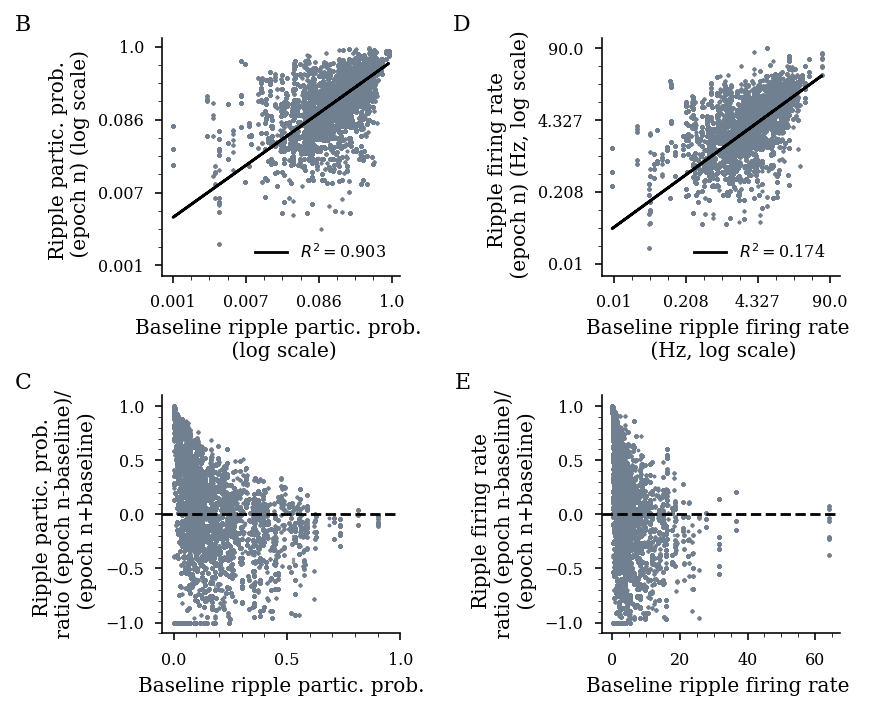

In [56]:
def restore_natural_scale(ax,min_,max_):
    """
    takes x and y ax that are in log10 and puts them into natural scale
    """
    x_ticks = np.linspace(min_,max_,4)
    ax.set_xticks(x_ticks)
    ax.set_yticks(x_ticks)
    ax.set_xticklabels(np.round(10**x_ticks,3))
    ax.set_yticklabels(np.round(10**x_ticks,3))

fig, axs = plt.subplots(2,2, figsize=functions.set_size('thesis', fraction=1.5, subplots=(2,2)), edgecolor='k')
fig.subplots_adjust(hspace = 0.5, wspace=-.2)
axs = axs.ravel()

bad_idx = np.isinf(df_pairs.x_par_log) | np.isnan(df_pairs.x_par_log) | np.isinf(df_pairs.y_par_log) | np.isnan(df_pairs.y_par_log)

x,y = df_pairs.x_par_log[~bad_idx], df_pairs.y_par_log[~bad_idx]

reg = RANSACRegressor(random_state=0).fit(np.expand_dims(x,axis=1), y)
axs[0].scatter(x,y,s=2,alpha=.25,color='slategrey',rasterized=True)
axs[0].plot(x,x*reg.estimator_.coef_+reg.estimator_.intercept_,
            color='k',
            label='$R^2=$'+str('%.3f'%(reg.score(np.expand_dims(x,axis=1),x))))
restore_natural_scale(axs[0],np.min([x,y]),np.log10(1))

x,y = df_pairs.x_fr_log[~bad_idx], df_pairs.y_fr_log[~bad_idx]
reg = RANSACRegressor(random_state=0).fit(np.expand_dims(x,axis=1), y)
axs[1].scatter(x,y,s=2,alpha=.25,color='slategrey',rasterized=True)
axs[1].plot(x,x*reg.estimator_.coef_+reg.estimator_.intercept_,
            color='k',
            label='$R^2=$'+str('%.3f'%(reg.score(np.expand_dims(x,axis=1),y))))
restore_natural_scale(axs[1],np.log10(0.01),np.log10(90))

axs[2].scatter(df_pairs.x_par,df_pairs.ratio_par,s=2,alpha=.25,color='slategrey',rasterized=True)
axs[2].set_xlim(-.05,1)
axs[2].axhline(0,color='k',ls='--')

axs[3].scatter(df_pairs.x_fr,df_pairs.ratio_fr,s=2,alpha=.25,color='slategrey',rasterized=True)
axs[3].axhline(0,color='k',ls='--')

axs[0].set_xlabel('Baseline ripple partic. prob. \n (log scale)')
axs[0].set_ylabel('Ripple partic. prob. \n (epoch n) (log scale)')

axs[1].set_xlabel('Baseline ripple firing rate \n (Hz, log scale)')
axs[1].set_ylabel('Ripple firing rate \n (epoch n) (Hz, log scale)')

axs[2].set_xlabel('Baseline ripple partic. prob.')
axs[2].set_ylabel('Ripple partic. prob. \n ratio (epoch n-baseline)/ \n (epoch n+baseline)')

axs[3].set_xlabel('Baseline ripple firing rate ')
axs[3].set_ylabel('Ripple firing rate  \n ratio (epoch n-baseline)/ \n (epoch n+baseline)')

axs[0].legend(frameon=False)
axs[1].legend(frameon=False)

axs[0].set_aspect('equal',adjustable='box')
axs[1].set_aspect('equal',adjustable='box')
axs[2].set_aspect(1./axs[2].get_data_ratio())
axs[3].set_aspect(1./axs[3].get_data_ratio())


axis_values = np.hstack(np.array((axs[0].get_xlim(),axs[0].get_ylim())))
axs[0].set_xlim(axis_values.min(),axis_values.max())
axs[0].set_ylim(axis_values.min(),axis_values.max())

axis_values = np.hstack(np.array((axs[1].get_xlim(),axs[1].get_ylim())))
axs[1].set_xlim(axis_values.min(),axis_values.max())
axs[1].set_ylim(axis_values.min(),axis_values.max())

for i in range(4):
    axs[i].spines["right"].set_visible(False)
    axs[i].spines["top"].set_visible(False)
    axs[i].xaxis.set_minor_locator(AutoMinorLocator())
    axs[i].yaxis.set_minor_locator(AutoMinorLocator())

for i, label in enumerate(('B','D','C','E')):
    axs[i].text(-0.55, 1.1, label, transform=axs[i].transAxes,
        fontsize=11, fontweight='normal', va='top', ha='right')

plt.savefig(os.path.join(fig_save_path,'participation_and_fr_baseline_vs_all_else_v2.svg'),dpi=300,bbox_inches='tight')

# See if experience affects ripple participation 

Firing rate gain from pre-sleep to task 1 relation to participation in post task sleep

In [43]:
df_ratios = pd.DataFrame()
fr_ratio = []
particip_prob_ratio = []
basepaths = []
deepSuperficial = []
for basepath in df.basepath.unique():
    epoch_n = df[df.basepath == basepath].epoch_n.unique()
    epoch_name = [df[df.basepath == basepath][df[df.basepath == basepath].epoch_n == ep_n].epoch.unique()[0] for ep_n in df[df.basepath == basepath].epoch_n.unique()]
    numeric_idx = ('sleep' == np.array(epoch_name))*1
    if all(numeric_idx[:3] == [1,0,1]):
        # fr from pre to task
        x1 = df[df.basepath == basepath][df[df.basepath == basepath].epoch_n == epoch_n[0]].avg_fr_not_rip
        x2 = df[df.basepath == basepath][df[df.basepath == basepath].epoch_n == epoch_n[1]].avg_fr_not_rip
        fr_ratio.append(standardized_ratio(x1.values,x2.values))

        # participation from pre to post sleep
        x1 = df[df.basepath == basepath][df[df.basepath == basepath].epoch_n == epoch_n[0]].participation_prob
        x2 = df[df.basepath == basepath][df[df.basepath == basepath].epoch_n == epoch_n[2]].participation_prob
        particip_prob_ratio.append(standardized_ratio(x1.values,x2.values))

        basepaths.append([basepath]*len(x1))
        deepSuperficial.append(df[df.basepath == basepath][df[df.basepath == basepath].epoch_n == epoch_n[0]].deepSuperficial)
    else:
        for i in np.arange(20)+1:
            if 3+i > len(numeric_idx):
                break
            if all(numeric_idx[0+i:3+i] == [1,0,1]):
                # fr from pre to task
                x1 = df[df.basepath == basepath][df[df.basepath == basepath].epoch_n == epoch_n[epoch_n[0+i:3+i][0]]].avg_fr_not_rip
                x2 = df[df.basepath == basepath][df[df.basepath == basepath].epoch_n == epoch_n[epoch_n[0+i:3+i][1]]].avg_fr_not_rip
                fr_ratio.append(standardized_ratio(x1.values,x2.values))

                # participation from pre to post sleep
                x1 = df[df.basepath == basepath][df[df.basepath == basepath].epoch_n == epoch_n[epoch_n[0+i:3+i][0]]].participation_prob
                x2 = df[df.basepath == basepath][df[df.basepath == basepath].epoch_n == epoch_n[epoch_n[0+i:3+i][2]]].participation_prob
                particip_prob_ratio.append(standardized_ratio(x1.values,x2.values))

                basepaths.append([basepath]*len(x1))
                deepSuperficial.append(df[df.basepath == basepath][df[df.basepath == basepath].epoch_n == epoch_n[0]].deepSuperficial)

df_ratios['basepath'] = np.hstack(basepaths) 
df_ratios['deepSuperficial'] = np.hstack(deepSuperficial) 
df_ratios['fr_ratio'] = np.hstack(fr_ratio)       
df_ratios['particip_prob_ratio'] = np.hstack(particip_prob_ratio)       
df_ratios

basepath deepSuperficial  fr_ratio  \
0    Z:\Data\AYAold\AB3\AB3_38_41            Deep  0.266966   
1    Z:\Data\AYAold\AB3\AB3_38_41            Deep  0.112032   
2    Z:\Data\AYAold\AB3\AB3_38_41            Deep  0.024308   
3    Z:\Data\AYAold\AB3\AB3_38_41            Deep  0.127765   
4    Z:\Data\AYAold\AB3\AB3_38_41            Deep  0.045089   
..                            ...             ...       ...   
423   Z:\Data\Kenji\ec016.577_590            Deep  0.072179   
424   Z:\Data\Kenji\ec016.577_590            Deep -0.170792   
425   Z:\Data\Kenji\ec016.577_590            Deep  0.562414   
426   Z:\Data\Kenji\ec016.577_590            Deep -0.223416   
427   Z:\Data\Kenji\ec016.577_590            Deep  0.411137   

     particip_prob_ratio  
0              -0.124604  
1              -0.012372  
2              -0.256041  
3              -0.240106  
4              -0.096372  
..                   ...  
423            -0.130899  
424            -0.048885  
425             0.045178  
426             0.018549  
427             0.260530  

[428 rows x 4 columns]

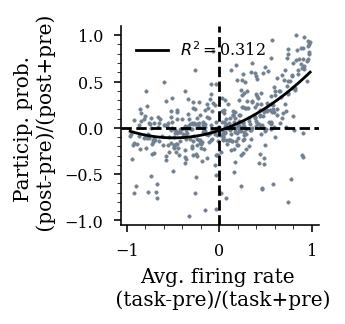

In [45]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

plt.figure(figsize=functions.set_size('thesis', fraction=.5, subplots=(1,1)), edgecolor='k')
plt.scatter(df_ratios.fr_ratio,df_ratios.particip_prob_ratio,s=3,alpha=1,color='slategrey')

plt.axvline(0,color='k',ls='--')
plt.axhline(0,color='k',ls='--')


polyreg=make_pipeline(PolynomialFeatures(2),LinearRegression())
X = df_ratios.fr_ratio.values.reshape(-1, 1)
y = df_ratios.particip_prob_ratio.values
X_seq = np.linspace(X.min(),X.max(),300).reshape(-1,1)

polyreg.fit(X,y)
plt.plot(X_seq,polyreg.predict(X_seq),color="black",label='$R^2=$'+str('%.3f'%(polyreg.score(X,y))))

plt.xlabel('Avg. firing rate \n (task-pre)/(task+pre)')
plt.ylabel('Particip. prob. \n (post-pre)/(post+pre)')
ax = plt.gca()
ax.set_aspect('equal', 'box')

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())

ax.legend(frameon=False)

plt.savefig(os.path.join(fig_save_path,'participation_and_fr_pre_task_post_ratios.svg'),dpi=300,bbox_inches='tight')

In [642]:
df_ratios.basepath.unique().shape

(23,)

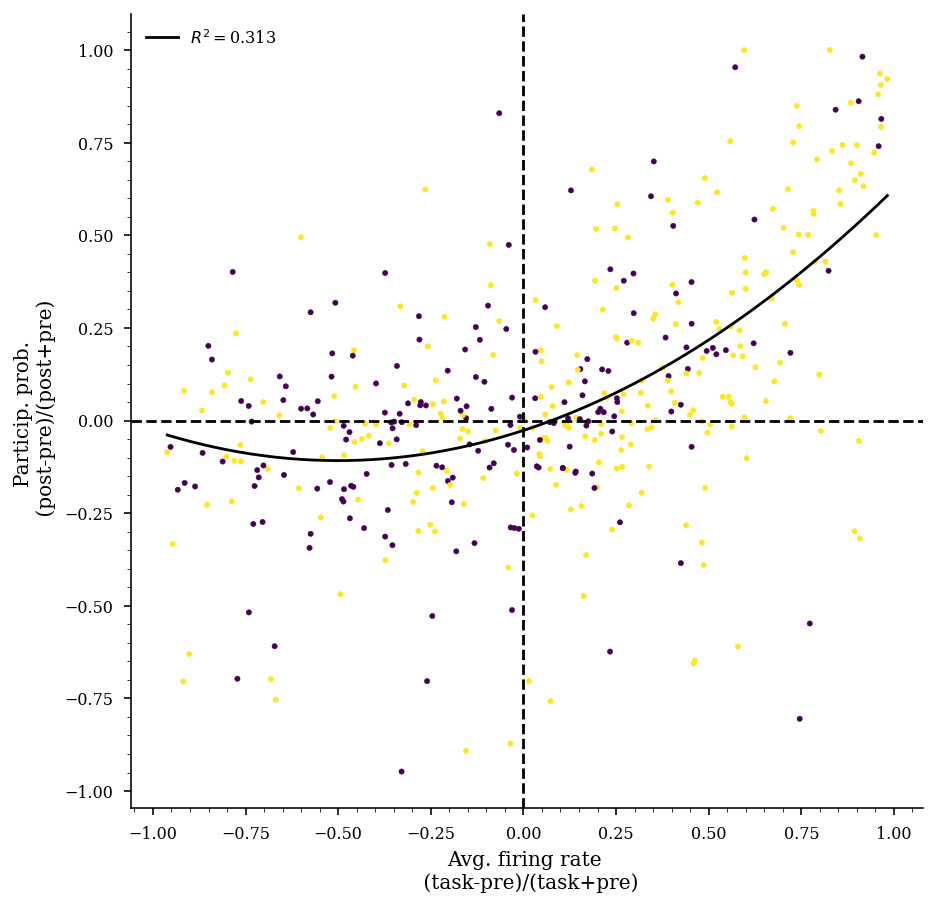

In [590]:
plt.figure(figsize=functions.set_size('thesis', fraction=2, subplots=(1,1)), edgecolor='k')
plt.scatter(df_ratios.fr_ratio,df_ratios.particip_prob_ratio,s=7,alpha=1,c=df_ratios.deepSuperficial=='Deep')

plt.axvline(0,color='k',ls='--')
plt.axhline(0,color='k',ls='--')


polyreg=make_pipeline(PolynomialFeatures(2),LinearRegression())
X = df_ratios.fr_ratio.values.reshape(-1, 1)
y = df_ratios.particip_prob_ratio.values
X_seq = np.linspace(X.min(),X.max(),300).reshape(-1,1)

polyreg.fit(X,y)
plt.plot(X_seq,polyreg.predict(X_seq),color="black",label='$R^2=$'+str('%.3f'%(polyreg.score(X,y))))

plt.xlabel('Avg. firing rate \n (task-pre)/(task+pre)')
plt.ylabel('Particip. prob. \n (post-pre)/(post+pre)')
ax = plt.gca()
ax.set_aspect('equal', 'box')

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())

ax.legend(frameon=False)

In [602]:
((df_ratios[~bad_idx].deepSuperficial=='Deep')*1).shape
# y.shape

(398,)

AttributeError: 'DataFrame' object has no attribute 'deepSuperficial'

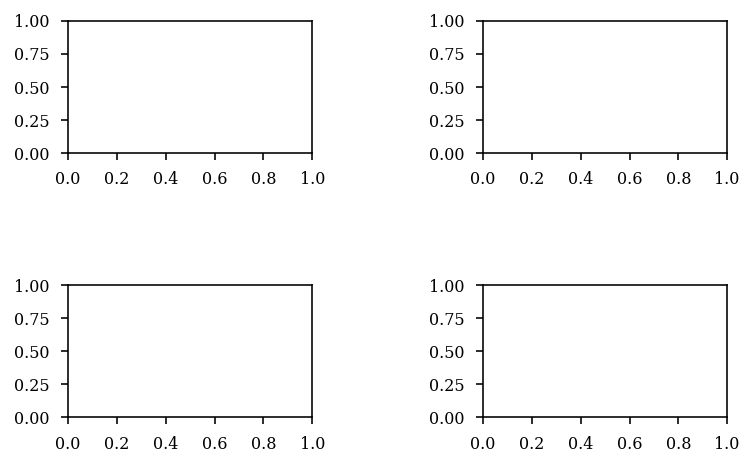

In [603]:
fig, axs = plt.subplots(2,2, figsize=functions.set_size('thesis', fraction=1, subplots=(2,2)), edgecolor='k')
fig.subplots_adjust(hspace = 1, wspace=.7)
axs = axs.ravel()

bad_idx = np.isinf(df_pairs.x_par_log) | np.isnan(df_pairs.x_par_log) | np.isinf(df_pairs.y_par_log) | np.isnan(df_pairs.y_par_log)

x,y = df_pairs.x_par_log[~bad_idx], df_pairs.y_par_log[~bad_idx]

reg = RANSACRegressor(random_state=0).fit(np.expand_dims(x,axis=1), y)
axs[0].scatter(x,y,s=2,alpha=.25,c=(df_pairs.deepSuperficial[~bad_idx]=='Deep')*1)
# axs[0].plot(x,x*reg.estimator_.coef_+reg.estimator_.intercept_,
#             color='k',
#             label='$R^2=$'+str('%.3f'%(reg.score(np.expand_dims(x,axis=1),y))))
# restore_natural_scale(axs[0],np.min([x,y]),np.log10(1))


C:\Users\Cornell\AppData\Local\Temp/ipykernel_31520/476379167.py:9: RuntimeWarning: invalid value encountered in true_divide
C:\Users\Cornell\anaconda3\envs\ripple_diversity\lib\site-packages\nelpy\core\_analogsignalarray.py:238: UserWarning: fs was estimated to be 0.008333333333333333 Hz


<AnalogSignalArray at 0x1d606e79e80: 30 signals (2 segments)> for a total of 1:42:00 hours

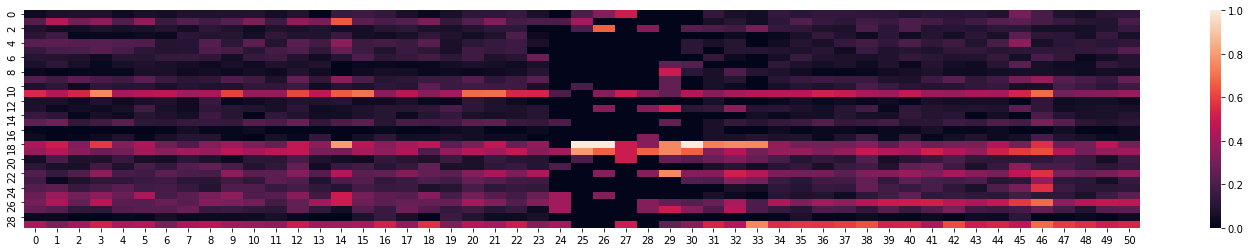

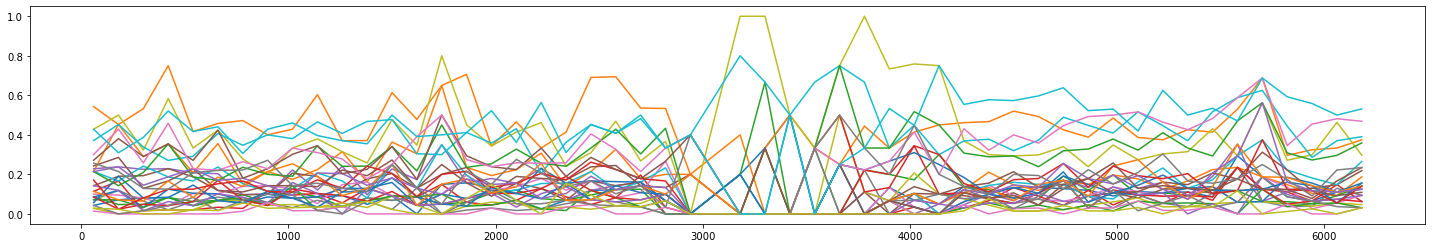

In [ ]:
bin_width = 120
bins = np.arange(behavioral_epochs.start,behavioral_epochs.stop,bin_width)
bin_centers = bins[0:-1] + bin_width/2
particip = []
n_ripples = []
for i in range(bins.shape[0]-1):
    idx = (unit_mat.abscissa_vals >= bins[i]) & (unit_mat.abscissa_vals <= bins[i+1])
    n_ripples.append(sum(idx))
    particip.append(np.sum(unit_mat.data[:,idx] == 1,axis=1)  / unit_mat.data[:,idx].shape[1])

particip = np.vstack(particip)
particip[np.isnan(particip)] = 0

# make sure each bin has at least 1 ripples
keep_idx = np.array(n_ripples)>0
particip = particip[keep_idx,:]
bin_centers = bin_centers[keep_idx]

unit_mat_binned = nel.AnalogSignalArray(data=particip.T,timestamps=bin_centers)

plt.figure(figsize=(25,4))

sns.heatmap(particip.T)    
plt.figure(figsize=(25,4))

plt.plot(unit_mat_binned.abscissa_vals,  unit_mat_binned.data.T)


unit_mat_binned

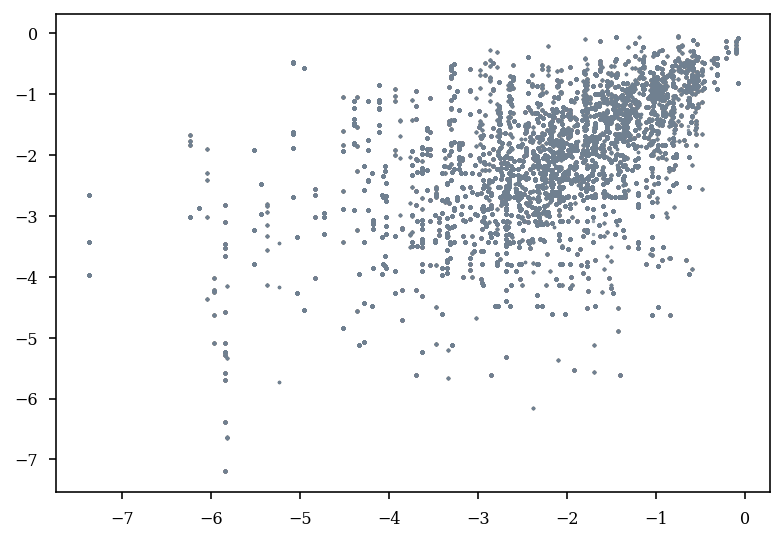

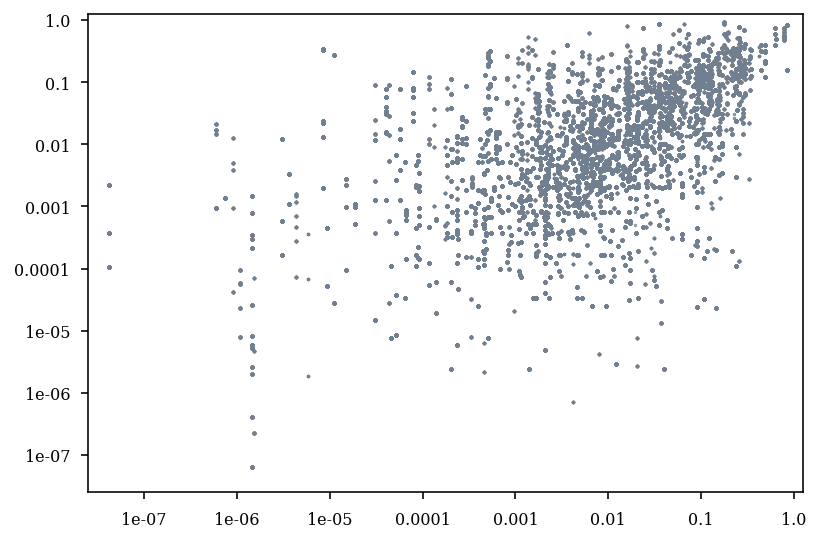

In [194]:
plt.scatter(np.log(df_pairs.x_par),np.log(df_pairs.y_par),s=2,alpha=.25,rasterized=True,color='slategrey')
plt.show()
plt.scatter(np.log(df_pairs.x_par),np.log(df_pairs.y_par),s=2,alpha=.25,rasterized=True,color='slategrey')
locs, labels = plt.xticks()
plt.xticks(locs, 10**locs)

locs, labels = plt.yticks()
plt.yticks(locs, 10**locs)
plt.xlim(np.log(0.0005),np.log(1.1)) 
plt.ylim(np.log(0.0005),np.log(1.1)) 

plt.show()

# calculate standard deviation of participation probability over epochs

In [192]:
temp_df = df[df.basepath == 'Z:\Data\AYAold\AB3\AB3_38_41']
X = np.zeros([temp_df.epoch_n.unique().shape[0],temp_df.UID.unique().shape[0]])
for i,ep in enumerate(temp_df.epoch_n.unique()):
    X[i,:] = temp_df[temp_df.epoch_n == ep].participation_prob.values
    

In [212]:
temp_df

Unnamed: 0  UID                             basepath      epoch  \
19184           0   15  Z:\Data\Kenji\i01_maze15_MS.001_004  bigSquare   
19186           2   17  Z:\Data\Kenji\i01_maze15_MS.001_004  bigSquare   
19189           5   21  Z:\Data\Kenji\i01_maze15_MS.001_004  bigSquare   
19190           6   22  Z:\Data\Kenji\i01_maze15_MS.001_004  bigSquare   
19192           8   24  Z:\Data\Kenji\i01_maze15_MS.001_004  bigSquare   
...           ...  ...                                  ...        ...   
19562         378  110  Z:\Data\Kenji\i01_maze15_MS.001_004      sleep   
19563         379  111  Z:\Data\Kenji\i01_maze15_MS.001_004      sleep   
19564         380  112  Z:\Data\Kenji\i01_maze15_MS.001_004      sleep   
19565         381  113  Z:\Data\Kenji\i01_maze15_MS.001_004      sleep   
19566         382  114  Z:\Data\Kenji\i01_maze15_MS.001_004      sleep   

       epoch_n  familiarity deepSuperficial brainRegion putativeCellType  \
19184        0         10.0            Deep         CA1   Pyramidal Cell   
19186        0         10.0            Deep         CA1   Pyramidal Cell   
19189        0         10.0            Deep         CA1   Pyramidal Cell   
19190        0         10.0            Deep         CA1   Pyramidal Cell   
19192        0         10.0            Deep         CA1   Pyramidal Cell   
...        ...          ...             ...         ...              ...   
19562        3         10.0            Deep         CA1   Pyramidal Cell   
19563        3         10.0            Deep         CA1   Pyramidal Cell   
19564        3         10.0            Deep         CA1   Pyramidal Cell   
19565        3         10.0            Deep         CA1   Pyramidal Cell   
19566        3         10.0            Deep         CA1   Pyramidal Cell   

       participation_prob  avg_fr_not_rip  avg_fr_in_rip  n_spikes  \
19184            0.026549        0.092492       0.280815     346.0   
19186            0.035398        0.057437       0.468025     218.0   
19189            0.106195        0.261837       1.778493     990.0   
19190            0.053097        0.048538       0.561629     186.0   
19192            0.256637        1.534347       5.709900    5751.0   
...                   ...             ...            ...       ...   
19562            0.074742        0.166958       1.651338    1453.0   
19563            0.135739        0.185577       3.109721    1899.0   
19564            0.086483        0.342071       2.275077    2730.0   
19565            0.083906        0.168650       1.835319    1505.0   
19566            0.078465        0.348534       1.745572    2654.0   

       session_dur  n_ripples unit_quality epoch_quality  
19184       3719.1        113         True          True  
19186       3719.1        113         True          True  
19189       3719.1        113         True          True  
19190       3719.1        113         True          True  
19192       3719.1        113         True          True  
...            ...        ...          ...           ...  
19562       6721.5       3492         True          True  
19563       6721.5       3492         True          True  
19564       6721.5       3492         True          True  
19565       6721.5       3492         True          True  
19566       6721.5       3492         True          True  

[192 rows x 17 columns]

[0.03539823 0.03723404 0.02847571 0.04209622]


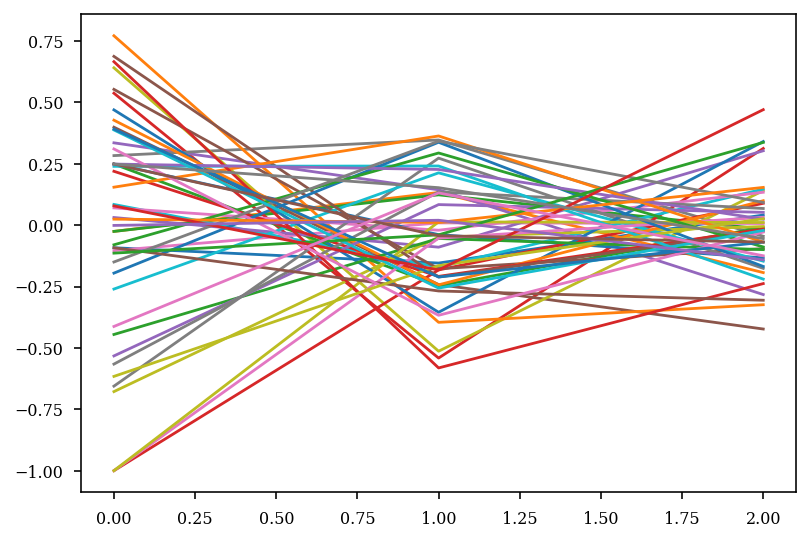

In [244]:
def get_stepwise_ratio(x):
    return [(x[i] - x[i+1]) / (x[i] + x[i+1]) for i in range(len(x)-1)]
        
print(X_participation_prob[:,1])

stepwise_ratio = get_stepwise_ratio(X_participation_prob)    
plt.plot(stepwise_ratio)
plt.show()

In [476]:
def get_stepwise_ratio(x):
    return [(x[i] - x[i+1]) / (x[i] + x[i+1]) for i in range(len(x)-1)]
        
df_save = pd.DataFrame()
for basepath in df.basepath.unique():
    temp_df = df[df.basepath == basepath]
    X_participation_prob = np.zeros([temp_df.epoch_n.unique().shape[0],temp_df.UID.unique().shape[0]])
    X_avgfr = np.zeros_like(X_participation_prob)
    for i,ep in enumerate(temp_df.epoch_n.unique()):
        X_participation_prob[i,:] = temp_df[temp_df.epoch_n == ep].participation_prob.values
        X_avgfr[i,:] = temp_df[temp_df.epoch_n == ep].avg_fr_in_rip.values

    stepwise_ratio_par = get_stepwise_ratio(X_participation_prob)    

    temp_df_idx = temp_df.epoch_n == temp_df.epoch_n.unique()[0]
    temp_df_ = pd.DataFrame()
    
    temp_df_['baseline_par'] = X_participation_prob[0,:]
    temp_df_['baseline_fr'] = X_avgfr[0,:]

    temp_df_['par_mean_diff'] = np.nanmean(np.diff(X_participation_prob,axis=0),axis=0)
    temp_df_['par_std'] = np.nanstd(X_participation_prob,axis=0)
    temp_df_['par_cv'] = np.nanstd(X_participation_prob,axis=0) / np.nanmean(X_participation_prob,axis=0)
    temp_df_['par_cv_raw'] = np.sqrt(np.exp(np.nanstd(np.log(X_participation_prob),axis=0)**2)-1)
    temp_df_['par_mean'] = np.nanmean(X_participation_prob,axis=0)
    temp_df_['par_median'] = np.nanmedian(X_participation_prob,axis=0)

    temp_df_['par_mean_diff_stepwise_ratio'] = np.nanmean(np.diff(stepwise_ratio_par,axis=0),axis=0)
    temp_df_['par_std_stepwise_ratio'] = np.nanstd(stepwise_ratio_par,axis=0)
    temp_df_['par_mean_stepwise_ratio'] = np.nanmean(stepwise_ratio_par,axis=0)
    temp_df_['par_median_stepwise_ratio'] = np.nanmedian(stepwise_ratio_par,axis=0)

    temp_df_['fr_mean_diff'] = np.nanmean(np.diff(X_avgfr,axis=0),axis=0)
    temp_df_['fr_std'] = np.nanstd(X_avgfr,axis=0)
    temp_df_['fr_mean'] = np.nanmean(X_avgfr,axis=0)
    temp_df_['fr_median'] = np.nanmedian(X_avgfr,axis=0)

    temp_df_['basepath'] = basepath
    temp_df_['UID'] = temp_df[temp_df_idx].UID.values
    temp_df_['deepSuperficial'] = temp_df[temp_df_idx].deepSuperficial.values
    temp_df_['n_spikes_mean'] = temp_df[temp_df_idx].n_spikes.values
    temp_df_['avg_fr_not_rip'] = temp_df[temp_df_idx].avg_fr_not_rip.values
    temp_df_['avg_fr_in_rip'] = temp_df[temp_df_idx].avg_fr_in_rip.values
    temp_df_['mean_n_ripples'] = temp_df.n_ripples.mean()

    df_save = df_save.append(temp_df_,ignore_index=True)
df_save

C:\Users\Cornell\AppData\Local\Temp/ipykernel_15436/13518189.py:24: RuntimeWarning: divide by zero encountered in log
C:\Users\Cornell\anaconda3\envs\ripple_diversity\lib\site-packages\numpy\lib\nanfunctions.py:1539: RuntimeWarning: invalid value encountered in subtract
C:\Users\Cornell\AppData\Local\Temp/ipykernel_15436/13518189.py:24: RuntimeWarning: divide by zero encountered in log
C:\Users\Cornell\anaconda3\envs\ripple_diversity\lib\site-packages\numpy\lib\nanfunctions.py:1539: RuntimeWarning: invalid value encountered in subtract
C:\Users\Cornell\AppData\Local\Temp/ipykernel_15436/13518189.py:24: RuntimeWarning: divide by zero encountered in log
C:\Users\Cornell\anaconda3\envs\ripple_diversity\lib\site-packages\numpy\lib\nanfunctions.py:1539: RuntimeWarning: invalid value encountered in subtract
C:\Users\Cornell\AppData\Local\Temp/ipykernel_15436/13518189.py:2: RuntimeWarning: invalid value encountered in true_divide
C:\Users\Cornell\AppData\Local\Temp/ipykernel_15436/13518189.py

baseline_par  baseline_fr  par_mean_diff   par_std    par_cv  par_cv_raw  \
0        0.355131     8.197266      -0.061559  0.070947  0.281938    0.286670   
1        0.178068     3.758967       0.001250  0.027960  0.172797    0.196457   
2        0.400402     8.423710      -0.046346  0.063374  0.216358    0.201127   
3        0.322938     6.974469       0.024930  0.089428  0.325084    0.336932   
4        0.185111     3.411753      -0.012461  0.016786  0.100635    0.101350   
..            ...          ...            ...       ...       ...         ...   
579      0.168142     2.714542      -0.031133  0.048361  0.325549    0.396312   
580      0.106195     2.059308       0.009848  0.013451  0.119433    0.113114   
581      0.115044     1.216864      -0.009520  0.017604  0.203479    0.194766   
582      0.035398     0.374420       0.016169  0.020090  0.297914    0.367087   
583      0.159292     1.965703      -0.026942  0.034902  0.345694    0.321617   

     par_mean  par_median  par_mean_diff_stepwise_ratio  \
0    0.251641    0.240490                     -0.015953   
1    0.161810    0.175892                     -0.121835   
2    0.292913    0.267045                     -0.119112   
3    0.275092    0.260411                     -0.307552   
4    0.166806    0.167193                      0.003573   
..        ...         ...                           ...   
579  0.148552    0.155879                      0.196044   
580  0.112624    0.106289                     -0.070089   
581  0.086513    0.080930                     -0.158894   
582  0.067434    0.074616                      0.144000   
583  0.100963    0.087105                     -0.151844   

     par_std_stepwise_ratio  ...    fr_std   fr_mean  fr_median  \
0                  0.190220  ...  1.714407  5.863521   5.950807   
1                  0.176051  ...  0.756483  3.378877   3.649823   
2                  0.097255  ...  1.416997  6.568050   6.497357   
3                  0.251206  ...  2.908513  6.212965   5.527228   
4                  0.035442  ...  0.289648  2.960109   2.901241   
..                      ...  ...       ...       ...        ...   
579                0.268438  ...  1.783714  3.510584   2.977105   
580                0.071560  ...  0.384592  2.518195   2.451875   
581                0.144167  ...  0.381068  1.772993   1.800015   
582                0.222209  ...  0.657105  1.510108   1.855458   
583                0.126716  ...  0.090905  1.811542   1.767957   

                                basepath  UID  deepSuperficial n_spikes_mean  \
0           Z:\Data\AYAold\AB3\AB3_38_41    1             Deep        2632.0   
1           Z:\Data\AYAold\AB3\AB3_38_41    2             Deep        1475.0   
2           Z:\Data\AYAold\AB3\AB3_38_41    3             Deep        7686.0   
3           Z:\Data\AYAold\AB3\AB3_38_41    4             Deep        4109.0   
4           Z:\Data\AYAold\AB3\AB3_38_41    5             Deep        3038.0   
..                                   ...  ...              ...           ...   
579  Z:\Data\Kenji\i01_maze15_MS.001_004  110             Deep        1490.0   
580  Z:\Data\Kenji\i01_maze15_MS.001_004  111             Deep        2451.0   
581  Z:\Data\Kenji\i01_maze15_MS.001_004  112             Deep        1309.0   
582  Z:\Data\Kenji\i01_maze15_MS.001_004  113             Deep          60.0   
583  Z:\Data\Kenji\i01_maze15_MS.001_004  114             Deep         198.0   

     avg_fr_not_rip avg_fr_in_rip  mean_n_ripples  
0          0.851347      8.197266           447.0  
1          0.499642      3.758967           447.0  
2          2.904931      8.423710           447.0  
3          1.486291      6.974469           447.0  
4          1.145997      3.411753           447.0  
..              ...           ...             ...  
579        0.393969      2.714542          1097.5  
580        0.654996      2.059308          1097.5  
581        0.349475      1.216864          1097.5  
582        0.015101      0.374420    

# task to task participation variability

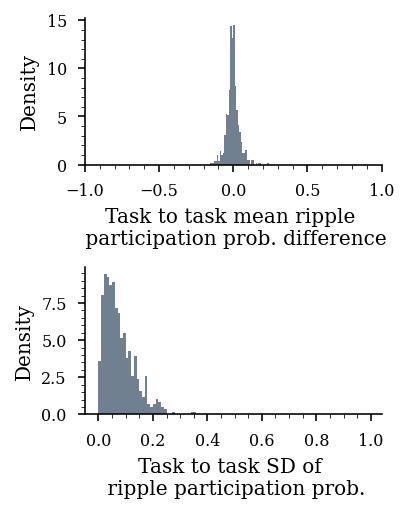

In [186]:
fig, axs = plt.subplots(2,1, figsize=functions.set_size('thesis', fraction=.45, subplots=(2,.9)), edgecolor='k')
fig.subplots_adjust(hspace = 0.7, wspace=.5)
axs = axs.ravel()

axs[0].hist(df_save.par_mean_diff,bins = np.arange(-1,1,.01),color='slategrey',density=True)
axs[0].set_xlim(-1,1)
axs[0].set_xlabel('Task to task mean ripple \n participation prob. difference')
axs[0].set_ylabel('Density')

axs[1].hist(df_save.par_std,bins = np.arange(0,1,.01),color='slategrey',density=True)
axs[1].set_xlabel('Task to task SD of \n ripple participation prob.')
axs[1].set_ylabel('Density')

for i in range(2):
    axs[i].spines["right"].set_visible(False)
    axs[i].spines["top"].set_visible(False)
    axs[i].xaxis.set_minor_locator(AutoMinorLocator())
    axs[i].yaxis.set_minor_locator(AutoMinorLocator())

plt.savefig(os.path.join(fig_save_path,'participation_mean_diff_over_epochs_w_sleep.svg'),dpi=300,bbox_inches='tight')

# task to task firing rate variability

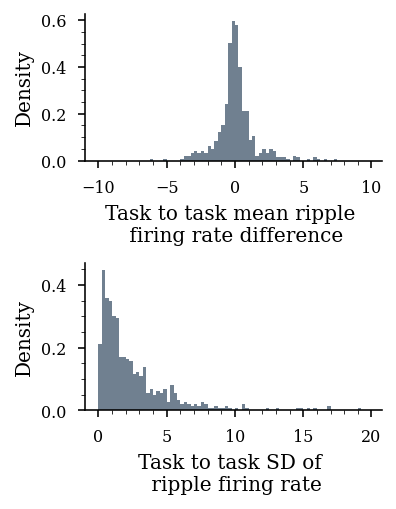

In [230]:
fig, axs = plt.subplots(2,1, figsize=functions.set_size('thesis', fraction=.45, subplots=(2,.9)), edgecolor='k')
fig.subplots_adjust(hspace = 0.7, wspace=.5)
axs = axs.ravel()

axs[0].hist(df_save.fr_mean_diff,bins = np.arange(-10,10,.25),color='slategrey',density=True)
axs[0].set_xlabel('Task to task mean ripple \n firing rate difference')
axs[0].set_ylabel('Density')

axs[1].hist(df_save.fr_std,bins = np.arange(0,20,.25),color='slategrey',density=True)
axs[1].set_xlabel('Task to task SD of \n ripple firing rate')
axs[1].set_ylabel('Density')

for i in range(2):
    axs[i].spines["right"].set_visible(False)
    axs[i].spines["top"].set_visible(False)
    axs[i].xaxis.set_minor_locator(AutoMinorLocator())
    axs[i].yaxis.set_minor_locator(AutoMinorLocator())

# plt.savefig(os.path.join(fig_save_path,'participation_mean_diff_over_epochs_w_sleep.svg'),dpi=300,bbox_inches='tight')

# task to task stepwise ratio variability

$ratio = \frac{participation_{task n} - participation_{task n+1}}{participation_{task n} + participation_{task n+1}} $

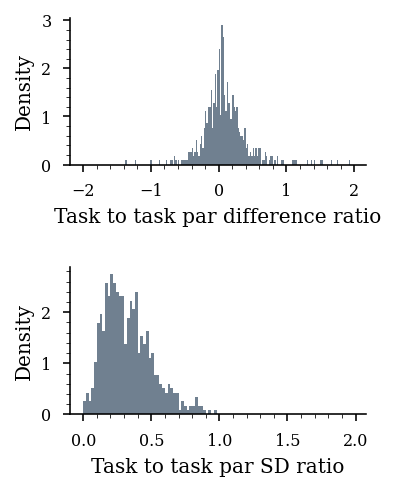

In [471]:
fig, axs = plt.subplots(2,1, figsize=functions.set_size('thesis', fraction=.45, subplots=(2,.9)), edgecolor='k')
fig.subplots_adjust(hspace = 0.7, wspace=.5)
axs = axs.ravel()

axs[0].hist(df_save.par_mean_diff_stepwise_ratio,bins = np.arange(-2,2,.02),color='slategrey',density=True)
axs[0].set_xlabel('Task to task par difference ratio')
axs[0].set_ylabel('Density')

axs[1].hist(df_save.par_std_stepwise_ratio,bins = np.arange(0,2,.02),color='slategrey',density=True)
axs[1].set_xlabel('Task to task par SD ratio')
axs[1].set_ylabel('Density')

for i in range(2):
    axs[i].spines["right"].set_visible(False)
    axs[i].spines["top"].set_visible(False)
    axs[i].xaxis.set_minor_locator(AutoMinorLocator())
    axs[i].yaxis.set_minor_locator(AutoMinorLocator())


In [278]:
df_save.keys()

Index(['par_mean_diff', 'par_std', 'par_mean', 'par_median',
       'par_mean_diff_stepwise_ratio', 'par_std_stepwise_ratio',
       'par_mean_stepwise_ratio', 'par_median_stepwise_ratio', 'fr_mean_diff',
       'fr_std', 'fr_mean', 'fr_median', 'basepath', 'UID', 'deepSuperficial',
       'n_spikes_mean', 'avg_fr_not_rip', 'avg_fr_in_rip', 'mean_n_ripples',
       'avg_fr_not_rip_log'],
      dtype='object')

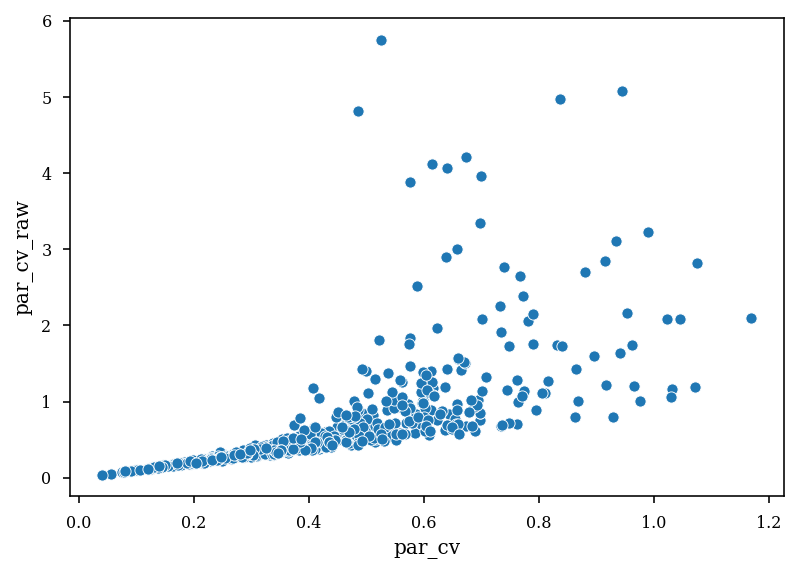

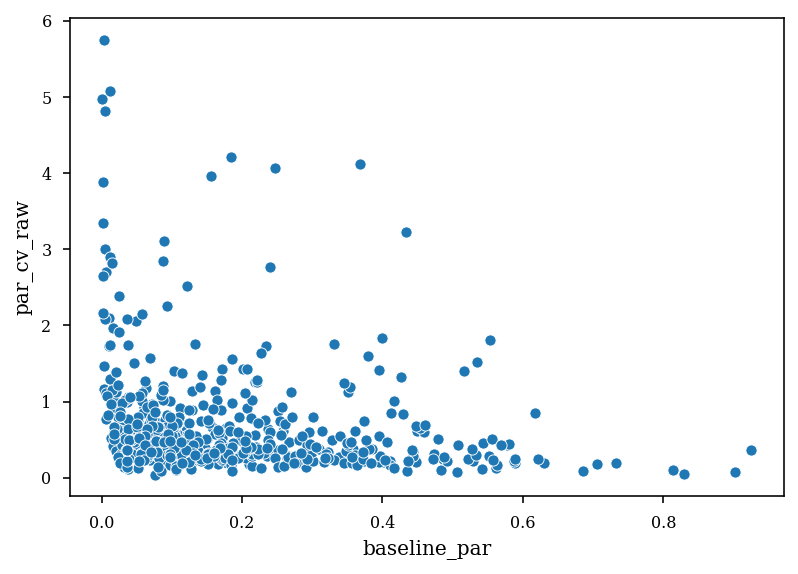

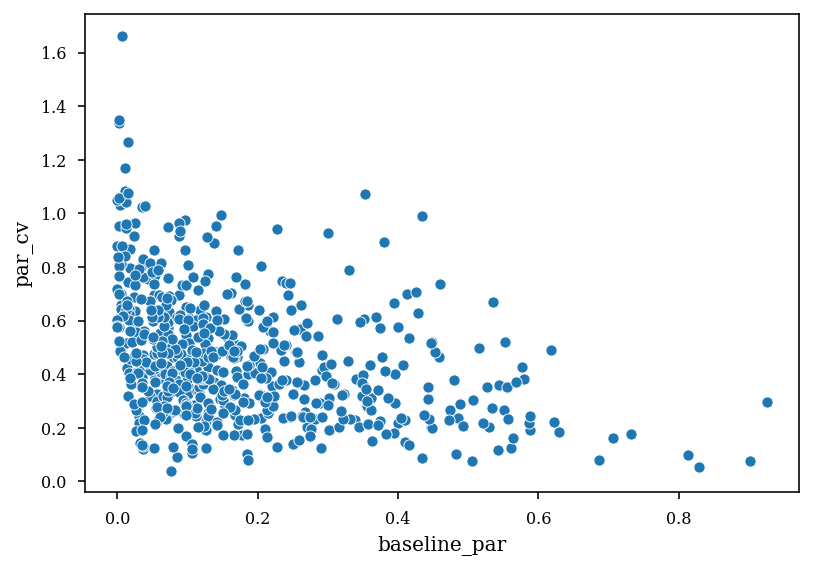

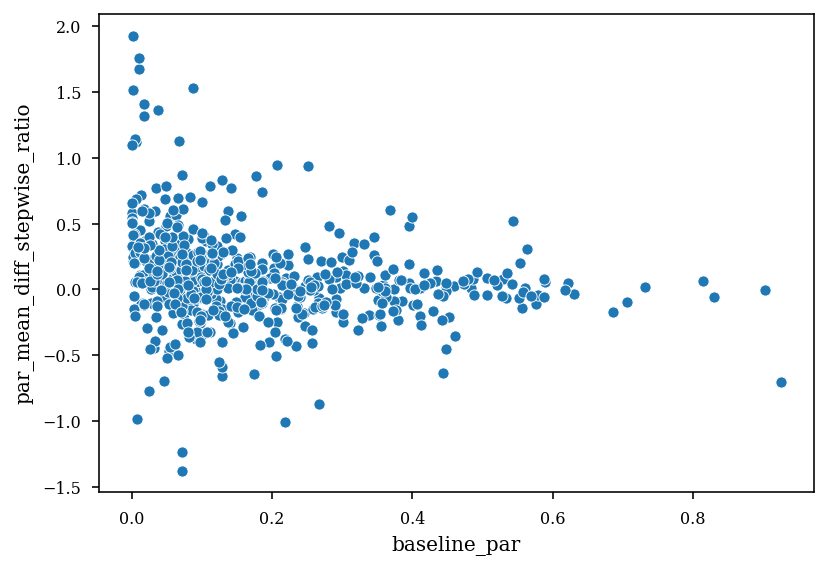

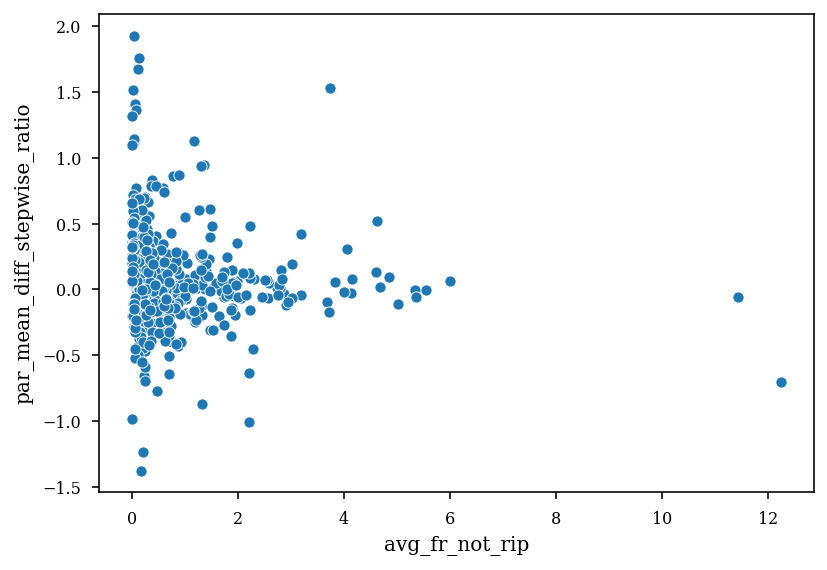

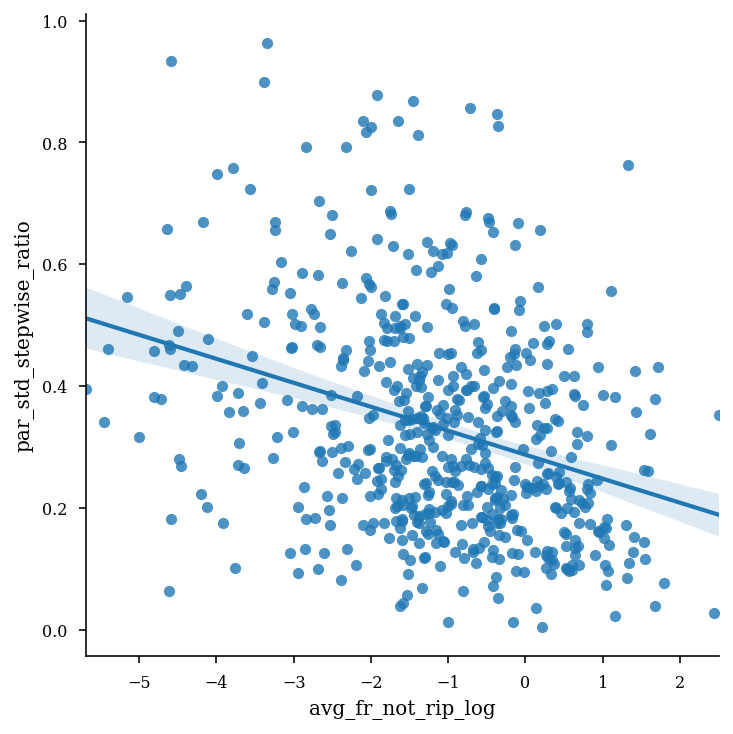

In [479]:
sns.scatterplot(x="par_cv", y="par_cv_raw",data=df_save)
plt.show()

sns.scatterplot(x="baseline_par", y="par_cv_raw",data=df_save)
plt.show()

sns.scatterplot(x="baseline_par", y="par_cv",data=df_save)
plt.show()

sns.scatterplot(x="baseline_par", y="par_mean_diff_stepwise_ratio",data=df_save)
# plt.axhline(0)
plt.show()

sns.scatterplot(x="avg_fr_not_rip", y="par_mean_diff_stepwise_ratio",data=df_save)
# plt.axhline(0)
plt.show()

df_save['avg_fr_not_rip_log'] = np.log(df_save.avg_fr_not_rip)
sns.lmplot(x="avg_fr_not_rip_log", y="par_std_stepwise_ratio",data=df_save)
plt.show()


<AxesSubplot:xlabel='deepSuperficial', ylabel='par_std'>

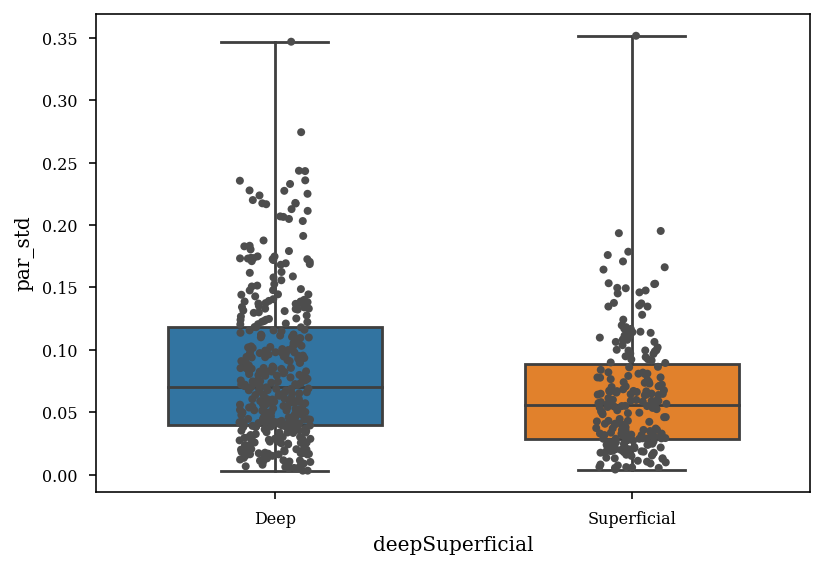

In [15]:
sns.boxplot(x="deepSuperficial", y="par_std", data=df_save,
            whis=[0, 100], width=.6)

sns.stripplot(x="deepSuperficial", y="par_std", data=df_save,
              size=4, color=".3", linewidth=0)

# population plot over epochs

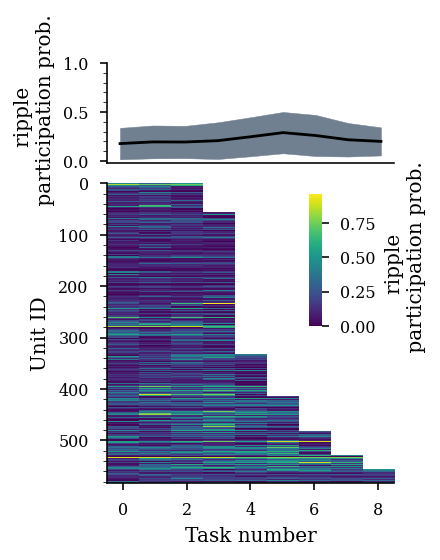

In [183]:
X_ = []
for u in range(df_save.shape[0]):
    X_.append(df[(df.basepath == df_save.iloc[u].basepath) & (df.UID == df_save.iloc[u].UID)].participation_prob.values)

X = np.zeros([len(X_),9])
X[X==0] = np.nan
for i,x in enumerate(X_):
    X[i,0:len(x)] = x
    
n_empty = [sum(np.isnan(x)) for x in X]

fig, axs = plt.subplots(2, 1, figsize=functions.set_size('thesis', fraction=.5, subplots=(2,1)),gridspec_kw={'height_ratios': [1, 3]})
fig.subplots_adjust(hspace = 0.1, wspace=0)
axs = axs.ravel()

X_nan = X.copy()
X_nan[X_nan==0] = np.nan

sem = np.nanstd(X_nan,axis=0) / np.sqrt(len(X_nan))
# y1,y2 = st.t.interval(alpha=0.95, df=len(X_nan)-1, loc=np.nanmean(X_nan,axis=0), scale=sem) 
# axs[0].fill_between(np.arange(X_nan.shape[1]),y2,y1,color='slategrey',label='95% CI')
sd = np.nanstd(X_nan,axis=0)

axs[0].fill_between(np.arange(X_nan.shape[1]),np.nanmean(X_nan,axis=0)-sd,np.nanmean(X_nan,axis=0)+sd,color='slategrey',label='$\pm sd$')
axs[0].plot(np.arange(X_nan.shape[1]),np.nanmean(X_nan,axis=0),color='k',label='mean')
axs[0].set_ylim(-.02,1)
axs[0].set_ylabel('ripple \n participation prob.')
axs[0].get_xaxis().set_visible(False)
# axs[0].legend(loc='best',frameon=False)

im = axs[1].imshow(X[np.argsort(-np.array(n_empty))],aspect='auto',interpolation='nearest')
axs[1].set_xlabel('Task number')
axs[1].set_ylabel('Unit ID')


plt.subplots_adjust(bottom=0.1, right=0.8, top=0.9)
cax = plt.axes([0.6, 0.40, 0.03, 0.25])
cbar = plt.colorbar(im,cax=cax)
cbar.set_label('ripple \n participation prob.', labelpad=5)
cbar.outline.set_visible(False)

for i in range(2):
    axs[i].spines["right"].set_visible(False)
    axs[i].spines["top"].set_visible(False)
    axs[i].yaxis.set_minor_locator(AutoMinorLocator())

plt.savefig(os.path.join(fig_save_path,'participation_mean_over_epochs.svg'),dpi=300,bbox_inches='tight')

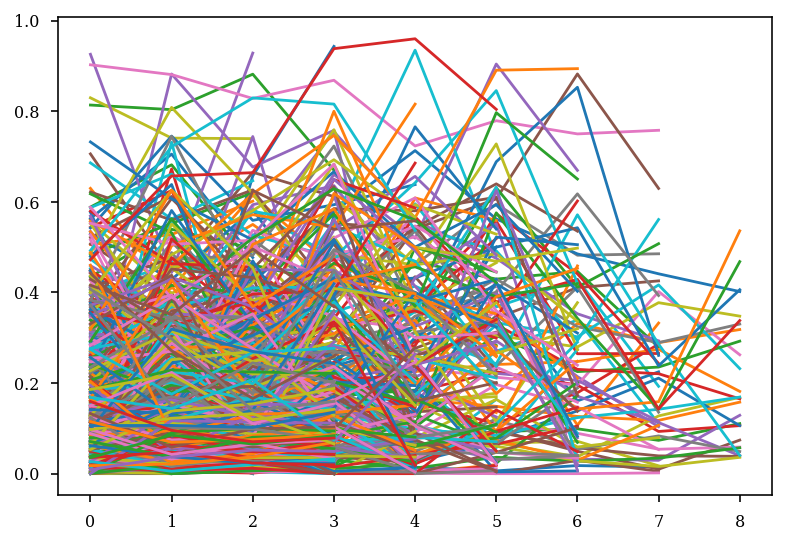

In [17]:
particip_mat = np.zeros(df_save.shape[0],9)
plt.figure()
for u in range(df_save.shape[0]):
    plt.plot(df[(df.basepath == df_save.iloc[u].basepath) & (df.UID == df_save.iloc[u].UID)].participation_prob.values)


# look at correlations within ripples

In [463]:

basepath = r'Z:\Data\AYAold\AYA9\day12'

cell_metrics,data,ripples,fs_dat = load_basic_data(basepath)
epoch_df = loading.load_epoch(basepath)
epoch_df = compress_repeated_epochs(epoch_df)

restrict_idx = ((cell_metrics.putativeCellType == "Pyramidal Cell") &
                    ((cell_metrics.brainRegion=="CA1") |
                    (cell_metrics.brainRegion=="rCA1") |
                    (cell_metrics.brainRegion=="lCA1")) &
                    (cell_metrics.bad_unit == False))
# restric cell metrics                      
cell_metrics = cell_metrics[restrict_idx]

# get ripple epochs
ripple_epochs = nel.EpochArray([np.array([ripples.start,ripples.stop]).T])

# idx = (cell_metrics.deepSuperficial=="Superficial")
st_unit = nel.SpikeTrainArray(timestamps=np.array(data['spikes'],dtype=object), fs=fs_dat)

behavioral_epochs = nel.EpochArray([np.array([epoch_df.startTime,epoch_df.stopTime]).T])


C:\Users\Cornell\anaconda3\envs\ripple_diversity\lib\site-packages\nelpy\core\_eventarray.py:709: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


In [464]:
def get_ripple_fr(st,ripple_epochs):
    # get participation prob.
    # make matrix n rows (units) by n cols (ripple epochs)
    unit_mat = np.zeros((st.n_units,ripple_epochs.n_intervals))
    for i,event in enumerate(st):
        unit_mat[:,i] = event.n_events/ripple_epochs[i].length
    return unit_mat

unit_mat = []
for i in range(behavioral_epochs.n_intervals):
    unit_mat.append(get_ripple_fr(st_unit[behavioral_epochs[i]][ripple_epochs],ripple_epochs[behavioral_epochs[i]]))

# unit_mat = []
# for i in range(behavioral_epochs.n_intervals):
#     unit_mat.append(get_participation(st_unit[behavioral_epochs[i]][ripple_epochs],ripple_epochs[behavioral_epochs[i]]))


C:\Users\Cornell\anaconda3\envs\ripple_diversity\lib\site-packages\nelpy\core\_eventarray.py:996: UserWarning: ignoring events outside of eventarray support
C:\Users\Cornell\anaconda3\envs\ripple_diversity\lib\site-packages\nelpy\core\_eventarray.py:996: UserWarning: ignoring events outside of eventarray support
C:\Users\Cornell\anaconda3\envs\ripple_diversity\lib\site-packages\nelpy\core\_eventarray.py:996: UserWarning: ignoring events outside of eventarray support


In [432]:
unit_mat_all = get_participation(st_unit[ripple_epochs],ripple_epochs)

C:\Users\Cornell\anaconda3\envs\ripple_diversity\lib\site-packages\nelpy\core\_eventarray.py:996: UserWarning: ignoring events outside of eventarray support


<AxesSubplot:>

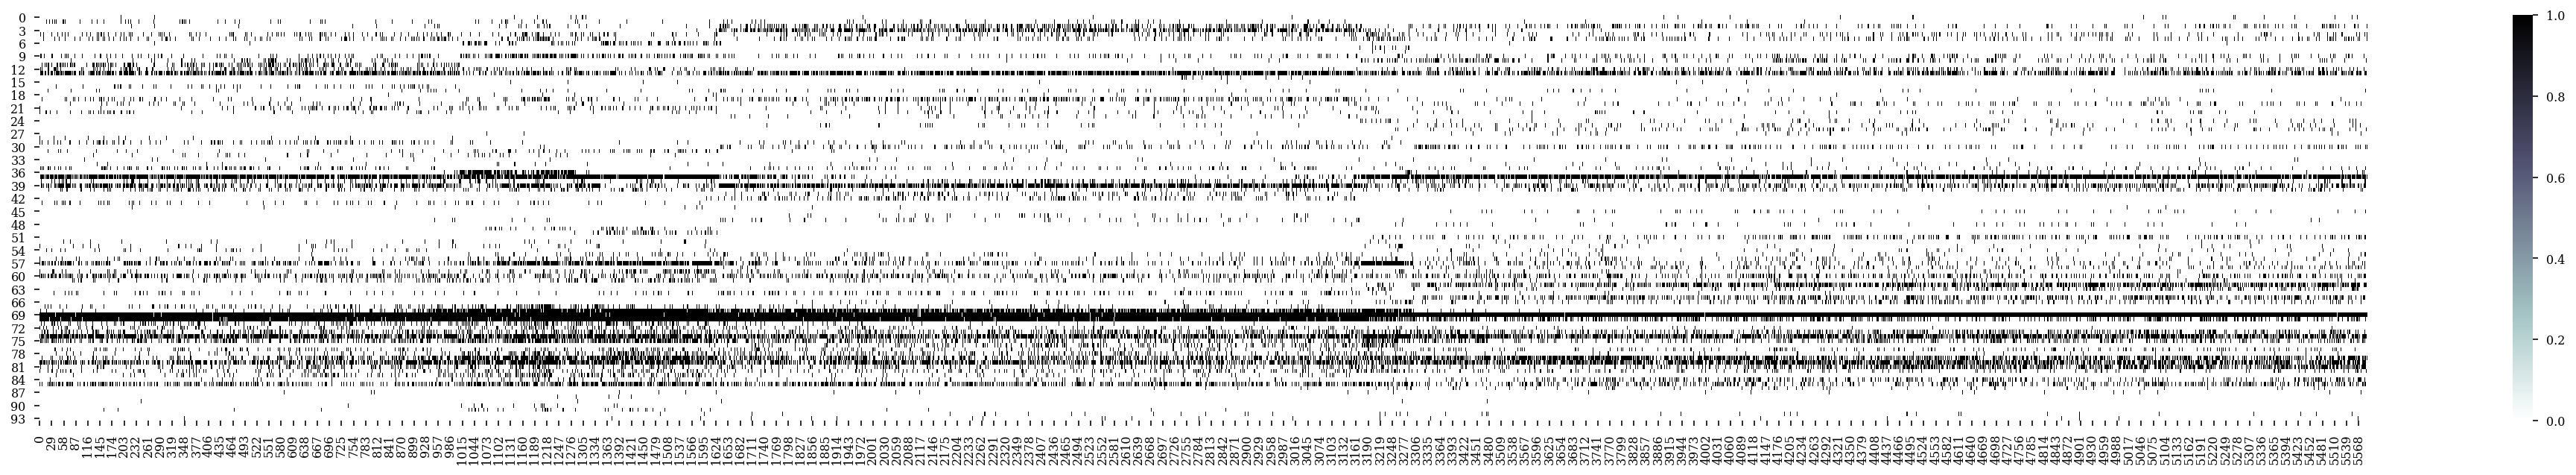

In [427]:
plt.figure(figsize=(35,5))
unit_mat_all_df = pd.DataFrame(index = np.arange(unit_mat_all.shape[0]), columns = np.arange(unit_mat_all.shape[1]))
unit_mat_all_df[:] = unit_mat_all
sns.heatmap(unit_mat_all_df,cmap="bone_r")

# plt.axvline(500,color='r')

# for be in behavioral_epochs:
#     plt.axvline(be.start,color='r')

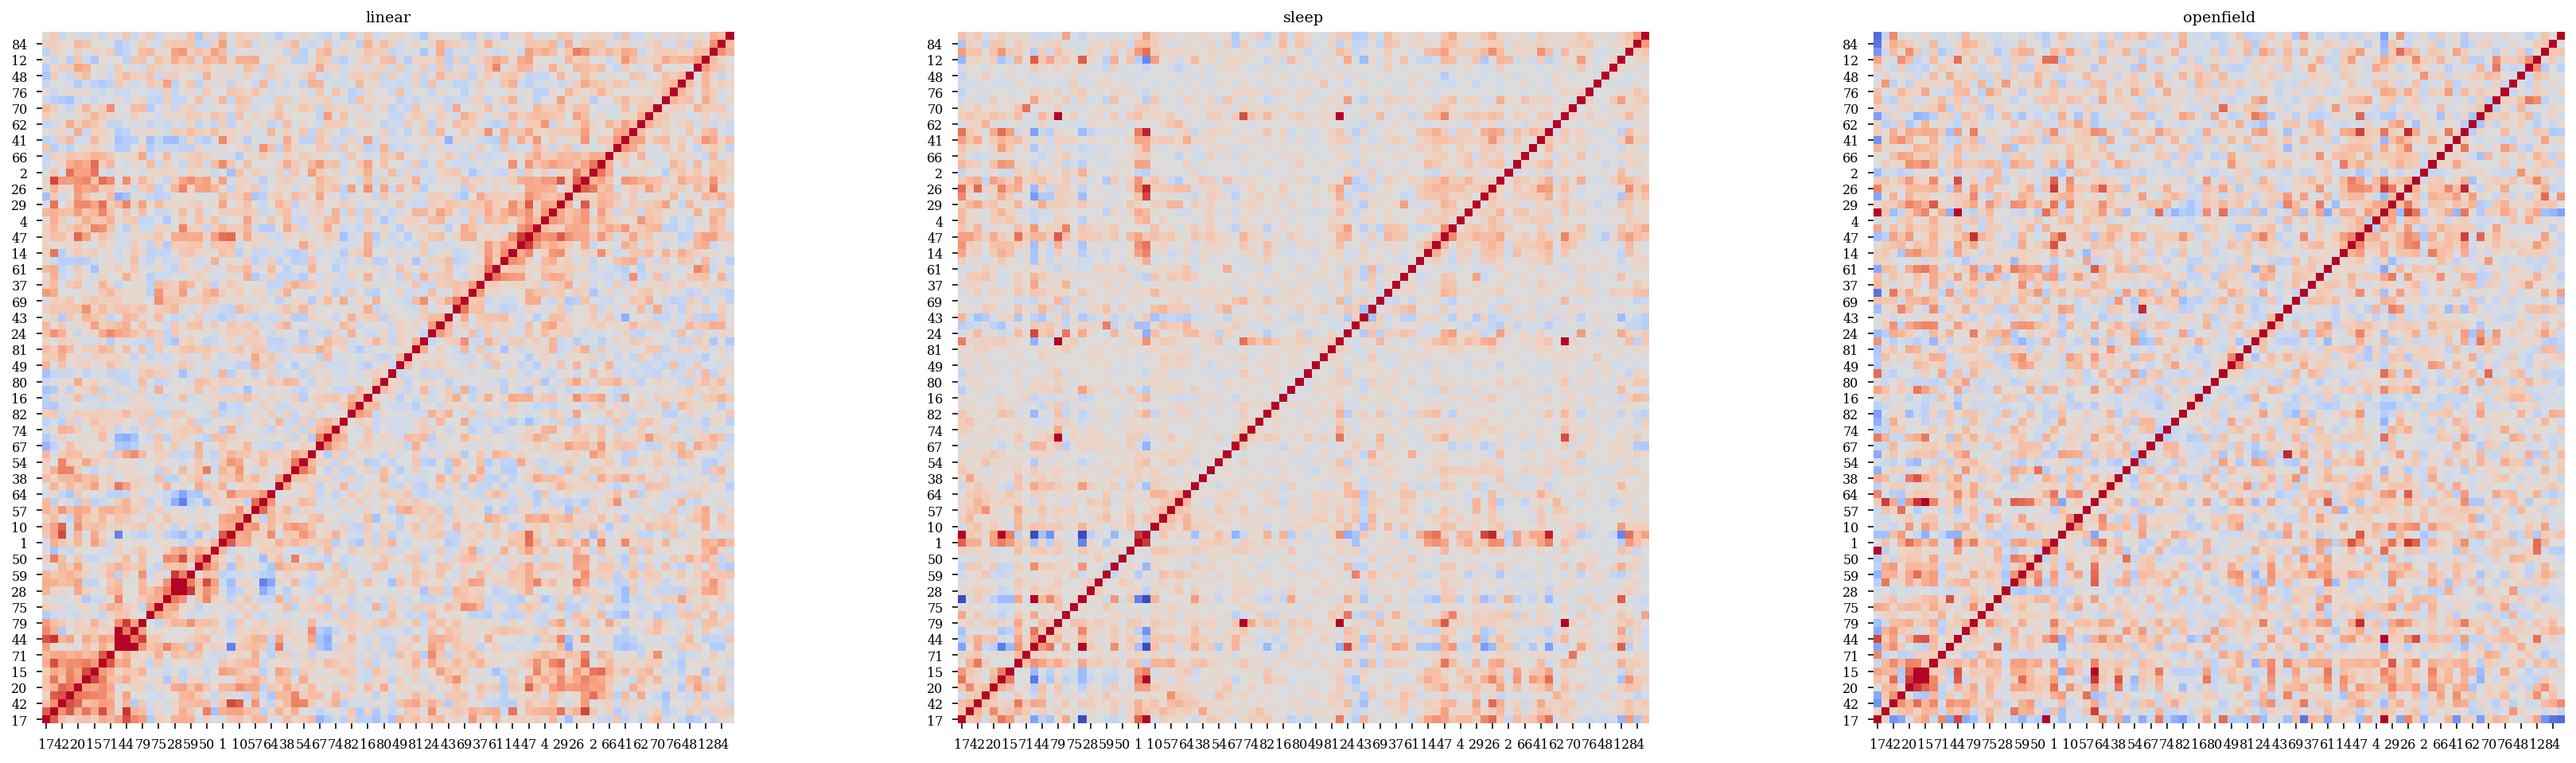

In [469]:
import scipy.cluster.hierarchy as sch

def get_corr_matrix(unit_mat):
    unit_mat_df_transpose = pd.DataFrame(index = np.arange(unit_mat.shape[1]), columns = np.arange(unit_mat.shape[0]))
    unit_mat_df_transpose[:] = unit_mat.T
    return unit_mat_df_transpose.corr(method="spearman")

def cluster_corr(corr_array):
    pairwise_distances = sch.distance.pdist(corr_array)
    linkage = sch.linkage(pairwise_distances, method='complete')
    cluster_distance_threshold = pairwise_distances.max()/2
    idx_to_cluster_array = sch.fcluster(linkage, cluster_distance_threshold, 
                                        criterion='distance')    
    return np.argsort(idx_to_cluster_array)


fig, axs = plt.subplots(1,behavioral_epochs.n_intervals,figsize=(30,8), edgecolor='k')
fig.subplots_adjust(hspace = 0.1, wspace=0.1)
axs = axs.ravel()

# remove_idx = np.sum(unit_mat[0] == 0,axis=1) == unit_mat[0].shape[1]
# remove_idx = sum(np.vstack(empty_)) > 0
# remove_idx = pd.unique(np.hstack(good_unit))
remove_idx = (
        (np.sum(unit_mat[0] > 0,axis=1)>10) &
        (np.sum(unit_mat[1] > 0,axis=1)>10) &
        (np.sum(unit_mat[2] > 0,axis=1)>10)
        )
# remove_idx = idx

unit_mat_corr = get_corr_matrix(unit_mat[0][remove_idx,:])
idx = cluster_corr(unit_mat_corr)

# cbar = False
for i in range(behavioral_epochs.n_intervals):
    # if i == behavioral_epochs.n_intervals-1:
    #     cbar = True
    unit_mat_corr = get_corr_matrix(unit_mat[i][remove_idx,:])
    unit_mat_corr[np.isnan(unit_mat_corr)] = 0
    sns.heatmap(unit_mat_corr.iloc[idx, :].T.iloc[idx, :],ax=axs[i],vmin=-.3,vmax=.3,cbar=False,cmap='coolwarm')
    # sns.heatmap(unit_mat_corr,ax=axs[i],vmin=-.1,vmax=.3)
    axs[i].set_aspect('equal','box')
    axs[i].invert_yaxis() 
    axs[i].set_title(epoch_df.environment[i])

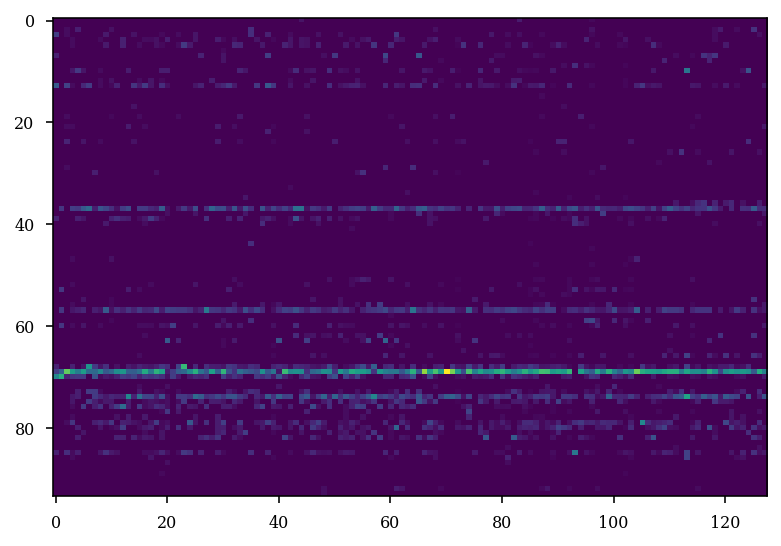

In [459]:
plt.imshow(unit_mat[3],aspect='auto',interpolation='nearest')

# code for plotting ripple raster with epochs

In [15]:
def get_raster_points(spikes,peak_time,duration=0.150):
    ''' 
    create raster centered over each ripple with a 1 second window
    '''
    x = []
    y = []
    for i,r in enumerate(peak_time):
        idx = (spikes> r - duration) & (spikes < r + duration)
        cur_spks = spikes[idx]
        if any(cur_spks):
            x.append(cur_spks - r)
            y.append(np.ones_like(cur_spks)+i) 
        else:      
            x.append([np.nan])
            y.append([1+i])
    x = list(itertools.chain(*x))
    y = list(itertools.chain(*y))
    return x, y

def get_h0_z_energy(x,y,duration=0.150,bin_count=150,window=30):
     # bin cell into 5ms bins 
    bins = np.linspace(-duration,duration,bin_count)
    h0_counts, bin_edges = np.histogram(x, bins=bins)
    # normalize into firing rate
    h0 = h0_counts / (len(np.unique(y))*np.diff(bins)[0])
    # smooth to get expected firing rate
    hist_smooth = gaussian_filter1d(h0,window)
    # subtract the expected rates and devided by the standard deviation to get z-scored modulation
    z = (h0 - hist_smooth) / np.sqrt(hist_smooth)
    # Calculate the amplitude of the SWR modulation
    swr_energy = np.sqrt(sum(z**2))
    return h0, z, swr_energy, h0_counts

def plot_psth(ripples,epoch_df,spikes,epoch_n,ax):
    duration = 0.150
    bin_count = 150
    bins_edges = np.linspace(-duration,duration,bin_count)
    bin_width = np.diff(bins_edges)[0]

    peak_time = ripples.peaks
    peak_time = peak_time[(peak_time >= epoch_df.iloc[epoch_n].startTime) & (peak_time <= epoch_df.iloc[epoch_n].stopTime)]
    x, y = get_raster_points(spikes,peak_time)  
    h0, z, swr_energy, h0_counts = get_h0_z_energy(x,y)

    ax[epoch_n].plot(bins_edges[:-1]+bin_width/2,h0,color='k',linewidth=.5)
    ax[epoch_n+epoch_df.shape[0]].scatter(x,y,color='k',s=1,rasterized=True)

    ax[epoch_n].set_title(epoch_df.iloc[epoch_n].environment)

def get_unit_par(ripples,spikes):
    unit_particip = np.zeros(ripples.shape[0])
    unit_fr= np.zeros_like(unit_particip)

    for i,rip in enumerate(ripples.itertuples()):
        unit_particip[i] = np.any((spikes >= rip.start) & (spikes <= rip.stop))
        unit_fr[i] = np.sum((spikes >= rip.start) & (spikes <= rip.stop)) / rip.duration

    # unit_particip_sm = gaussian_filter1d(unit_particip,10)
    unit_particip_sm = gaussian_filter1d(unit_particip,30)
    return unit_particip,unit_fr,unit_particip_sm

def plot_epoched_ripple_spikes(epoch_df,spikes):
    X = []
    Y = []
    for epoch_n in range(epoch_df.shape[0]):
        peak_time = ripples.peaks
        peak_time = peak_time[(peak_time >= epoch_df.iloc[epoch_n].startTime) & (peak_time <= epoch_df.iloc[epoch_n].stopTime)]
        x, y = get_raster_points(spikes,peak_time)  
        X.append(x)
        Y.append(y)

    X = np.array(X,dtype=object)
    Y = np.array(Y,dtype=object)

    y_adj = []
    y_adj.append(Y[0])
    for i in np.arange(1,len(X)):
        try:
            y_adj.append(Y[i] + np.max(y_adj[i-1]))
        except:
            y_adj.append(Y[i])

    fig, axs = plt.subplots(1,2, figsize=functions.set_size('thesis', fraction=.75, subplots=(1.5,1)), edgecolor='k')
    fig.subplots_adjust(hspace = 0.1, wspace=0.05)
    axs = axs.ravel()

    for i in np.arange(0,len(X)):
        if epoch_df.iloc[i].environment == "sleep":
            axs[0].scatter(X[i],y_adj[i],s=1,color="k",label=epoch_df.iloc[i].environment)  
        else:
            axs[0].scatter(X[i],y_adj[i],s=1,label=epoch_df.iloc[i].environment)  

    axs[0].spines["right"].set_visible(False)
    axs[0].spines["top"].set_visible(False)
    # axs[0].legend(bbox_to_anchor=(1, .1, 0.5, .5),frameon=False,ncol=5,labelspacing=.1)
    axs[0].legend(bbox_to_anchor=[1.6, 1.01], loc='center right',frameon=False,ncol=3,labelspacing=.1,markerscale=4)
    #  bbox_to_anchor=(0.5, 0., 0.5, 0.5)
    axs[0].set_ylabel('n ripples')
    axs[0].set_xlabel('ripple time lag (sec)')
    # axs[0].axvline(0,color="grey",zorder=-100)
    axs[0].set_ylim(0,ripples.shape[0])

    axs[1].plot(unit_particip_sm, np.arange(len(unit_particip_sm)),color="k",linewidth=1,zorder=-1000)
    axs[1].set_xlim(0,1)
    axs[1].set_ylim(0,ripples.shape[0])
    axs[1].axes.yaxis.set_visible(False)
    axs[1].spines["top"].set_visible(False)
    axs[1].spines["right"].set_visible(False)
    axs[1].spines["left"].set_visible(False)
    axs[1].set_xlabel('ripple participation \n probability')
    
# fig, axs = plt.subplots(2,epoch_df.shape[0], figsize=functions.set_size('thesis', fraction=3, subplots=(3, epoch_df.shape[0])), edgecolor='k')
# fig.subplots_adjust(hspace = 0.1, wspace=.5)
# axs = axs.ravel()

# for epoch_n in range(epoch_df.shape[0]):
#     plot_psth(ripples,epoch_df,spikes,epoch_n,axs)
# axs[0].set_ylabel('FR')
# axs[epoch_df.shape[0]].set_ylabel('ripple n')

# plt.savefig(os.path.join(fig_save_path,'participation_over_epoch_example.pdf'),dpi=300,bbox_inches='tight')


In [ ]:
# high and stable participation
85


In [26]:
np.where((df_save.par_std < .1) & (df_save.avg_fr_in_rip >6 ) & (df_save.par_mean > .4))


(array([ 71,  80,  85,  92,  98, 100, 120, 129, 132, 136, 159, 161, 162,
        170, 186, 278, 322], dtype=int64),)

In [19]:
idx = 11
for idx in range(df_save.shape[0]):

    basepath = df_save.iloc[idx].basepath

    UID = df_save.iloc[idx].UID

    cell_metrics,data,ripples,fs_dat = load_basic_data(basepath)

    epoch_df = loading.load_epoch(basepath)
    epoch_df = compress_repeated_epochs(epoch_df)
    spikes = data['spikes'][np.where(cell_metrics.UID == UID)[0][0]]
    unit_particip,unit_fr,unit_particip_sm = get_unit_par(ripples,spikes)

    plot_epoched_ripple_spikes(epoch_df,spikes)
    plt.savefig(os.path.join(r'Z:\home\ryanh\projects\ripple_heterogeneity\figures\panels\particip_epoch_examples',str(idx)+'.png'),dpi=300,bbox_inches='tight')
    plt.close()

In [16]:
# df_spk = pd.DataFrame()
binned_spk = []
for rip in ripples.itertuples():
    idx = (spikes > rip.peaks - .15) & (spikes < rip.peaks + .15)
    bins = np.arange(rip.peaks - .15,rip.peaks + .15,.001)
    binned,_= np.histogram(spikes[idx],bins=bins)
    binned_spk.append(binned)

NameError: name 'ripples' is not defined

Text(0.5, 0, 'ripple participation \n probability')

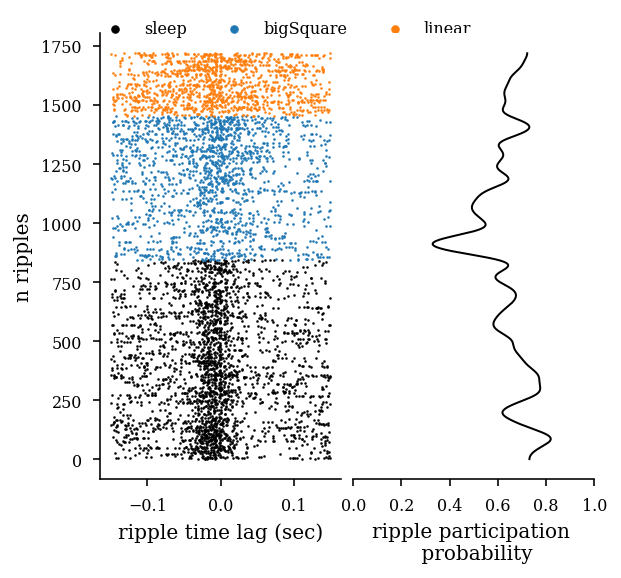

In [102]:
X = []
Y = []
for epoch_n in range(epoch_df.shape[0]):
    peak_time = ripples.peaks
    peak_time = peak_time[(peak_time >= epoch_df.iloc[epoch_n].startTime) & (peak_time <= epoch_df.iloc[epoch_n].stopTime)]
    x, y = get_raster_points(spikes,peak_time)  
    X.append(x)
    Y.append(y)

X = np.array(X,dtype=object)
Y = np.array(Y,dtype=object)

y_adj = []
y_adj.append(Y[0])
for i in np.arange(1,len(X)):
    y_adj.append(Y[i] + max(y_adj[i-1]))
# y_adj = np.hstack(y_adj)
# X = np.hstack(X)

fig, axs = plt.subplots(1,2, figsize=functions.set_size('thesis', fraction=.75, subplots=(1.5,1)), edgecolor='k')
fig.subplots_adjust(hspace = 0.1, wspace=0.05)
axs = axs.ravel()

for i in np.arange(0,len(X)):
    if epoch_df.iloc[i].environment == "sleep":
        axs[0].scatter(X[i],y_adj[i],s=1,color="k",label=epoch_df.iloc[i].environment)  
    else:
        axs[0].scatter(X[i],y_adj[i],s=1,label=epoch_df.iloc[i].environment)  

axs[0].spines["right"].set_visible(False)
axs[0].spines["top"].set_visible(False)
# axs[0].legend(bbox_to_anchor=(1, .1, 0.5, .5),frameon=False,ncol=5,labelspacing=.1)
axs[0].legend(bbox_to_anchor=[1.6, 1.01], loc='center right',frameon=False,ncol=3,labelspacing=.1,markerscale=4)
#  bbox_to_anchor=(0.5, 0., 0.5, 0.5)
axs[0].set_ylabel('n ripples')
axs[0].set_xlabel('ripple time lag (sec)')
# axs[0].axvline(0,color="grey",zorder=-100)

axs[1].plot(unit_particip_sm, np.arange(len(unit_particip_sm)),color="k",linewidth=1,zorder=-1000)
axs[1].set_xlim(0,1)
axs[1].axes.yaxis.set_visible(False)
axs[1].spines["top"].set_visible(False)
axs[1].spines["right"].set_visible(False)
axs[1].spines["left"].set_visible(False)
axs[1].set_xlabel('ripple participation \n probability')

# axs[1].axhspan(epoch_df.iloc[1].startTime,epoch_df.iloc[1].stopTime)
# ax = plt.gca()
# plt.savefig(os.path.join(fig_save_path,'participation_epoch_stability_example_high_par.svg'),dpi=300,bbox_inches='tight')


In [71]:
df_save[(df_save.par_mean > .6) & (df_save.par_std < .1)]

par_mean_diff   par_std  par_mean  par_median  \
11      -0.019701  0.051608  0.631644    0.646617   
22       0.023915  0.072528  0.615744    0.593750   
38      -0.020655  0.063334  0.811334    0.803674   

                       basepath  UID deepSuperficial  n_spikes_mean  \
11  Z:\Data\Kenji\ec013.152_157   72            Deep    4575.809524   
22  Z:\Data\Kenji\ec013.194_213   81            Deep    4593.740000   
38  Z:\Data\Kenji\ec013.370_390   83            Deep    3119.312500   

    avg_fr_not_rip  avg_fr_in_rip  mean_n_ripples  
11        1.873206       9.557184      573.333333  
22        1.146018       6.578378     1117.800000  
38        1.223853      10.598985      374.375000

Text(0.5, 0, 'ripple participation \n probability')

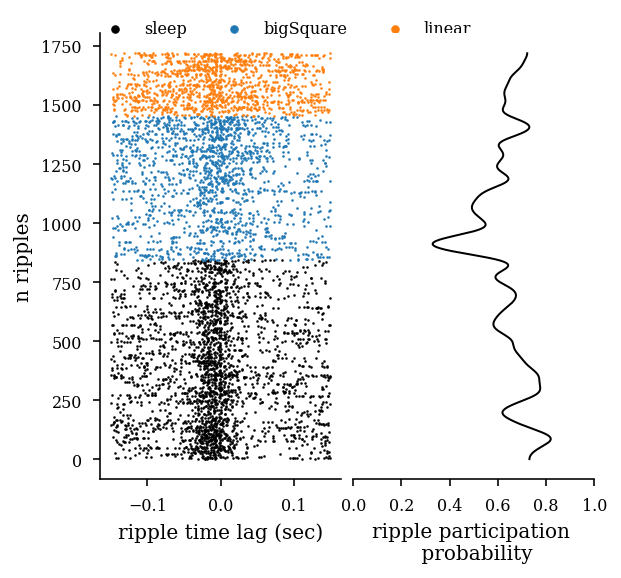

In [574]:
df_save[df_save.par_mean > .6]

basepath = 'Z:\Data\Kenji\ec013.152_157'
UID = 72

cell_metrics,data,ripples,fs_dat = load_basic_data(basepath)

epoch_df = loading.load_epoch(basepath)
epoch_df = compress_repeated_epochs(epoch_df)

spikes = data['spikes'][np.where(cell_metrics.UID == UID)[0][0]]


unit_particip = np.zeros(ripples.shape[0])
unit_fr= np.zeros_like(unit_particip)

for i,rip in enumerate(ripples.itertuples()):
    unit_particip[i] = np.any((spikes >= rip.start) & (spikes <= rip.stop))
    unit_fr[i] = np.sum((spikes >= rip.start) & (spikes <= rip.stop)) / rip.duration

# unit_particip_sm = gaussian_filter1d(unit_particip,10)
unit_particip_sm = gaussian_filter1d(unit_particip,30)


X = []
Y = []
for epoch_n in range(epoch_df.shape[0]):
    peak_time = ripples.peaks
    peak_time = peak_time[(peak_time >= epoch_df.iloc[epoch_n].startTime) & (peak_time <= epoch_df.iloc[epoch_n].stopTime)]
    x, y = get_raster_points(spikes,peak_time)  
    X.append(x)
    Y.append(y)

X = np.array(X,dtype=object)
Y = np.array(Y,dtype=object)

y_adj = []
y_adj.append(Y[0])
for i in np.arange(1,len(X)):
    y_adj.append(Y[i] + max(y_adj[i-1]))

fig, axs = plt.subplots(1,2, figsize=functions.set_size('thesis', fraction=.75, subplots=(1.5,1)), edgecolor='k')
fig.subplots_adjust(hspace = 0.1, wspace=0.05)
axs = axs.ravel()

for i in np.arange(0,len(X)):
    if epoch_df.iloc[i].environment == "sleep":
        axs[0].scatter(X[i],y_adj[i],s=1,color="k",label=epoch_df.iloc[i].environment)  
    else:
        axs[0].scatter(X[i],y_adj[i],s=1,label=epoch_df.iloc[i].environment)  

axs[0].spines["right"].set_visible(False)
axs[0].spines["top"].set_visible(False)
# axs[0].legend(bbox_to_anchor=(1, .1, 0.5, .5),frameon=False,ncol=5,labelspacing=.1)
axs[0].legend(bbox_to_anchor=[1.6, 1.01], loc='center right',frameon=False,ncol=3,labelspacing=.1,markerscale=4)
#  bbox_to_anchor=(0.5, 0., 0.5, 0.5)
axs[0].set_ylabel('n ripples')
axs[0].set_xlabel('ripple time lag (sec)')
# axs[0].axvline(0,color="grey",zorder=-100)

axs[1].plot(unit_particip_sm, np.arange(len(unit_particip_sm)),color="k",linewidth=1,zorder=-1000)
axs[1].set_xlim(0,1)
axs[1].axes.yaxis.set_visible(False)
axs[1].spines["top"].set_visible(False)
axs[1].spines["right"].set_visible(False)
axs[1].spines["left"].set_visible(False)
axs[1].set_xlabel('ripple participation \n probability')

# Pairwise correlation analysis

In [508]:
n_units = []
for basepath in df.basepath:
    n_units.append(df[(df.basepath == basepath) & (df.epoch_n == df[df.basepath == basepath].epoch_n.iloc[0])].shape[0])

In [509]:
def pairwise_corr(df):
    x = df.epoch_n.unique()
    c = np.array(list(itertools.combinations(x, 2)))
    rho = []
    pval = []
    x = []
    x1 = []
    for i,s in enumerate(c):
        x.append(df[df.epoch_n==s[0]].participation_prob.values)	
        x1.append(df[df.epoch_n==s[1]].participation_prob.values)

        rho_, pval_ = stats.spearmanr(df[df.epoch_n==s[0]].participation_prob,
                                        df[df.epoch_n==s[1]].participation_prob)
        rho.append(rho_)
        pval.append(pval_)
    return rho,pval,c,x,x1

df_save = pd.DataFrame()
X1 = []
X2 = []
for basepath in df[np.array(n_units)>=7].basepath.unique():
    if df[(df.basepath == basepath)].epoch_n.unique().shape[0] > 1:
        rho,pval,c,x,x1 = pairwise_corr(df[(df.basepath == basepath)])
        X1.append(x)
        X2.append(x1)
        
        temp_df = pd.DataFrame()

        temp_df['ref'] = c[:,0]
        temp_df['target'] = c[:,1]
        temp_df['rho'] = rho
        temp_df['pval'] = pval
        temp_df['basepath'] = basepath

        df_save = df_save.append(temp_df,ignore_index=True)
# df_save

In [282]:
# from sklearn.linear_model import RANSACRegressor

# # x1 = np.expand_dims(x1,axis=0)
# reg = RANSACRegressor(random_state=0).fit(np.expand_dims(x1,axis=1), x2)
# reg.score(np.expand_dims(x1,axis=1),x2)
# reg.predict(np.expand_dims(x1,axis=1))

# plt.plot(x1,reg.predict(np.expand_dims(x1,axis=1)))

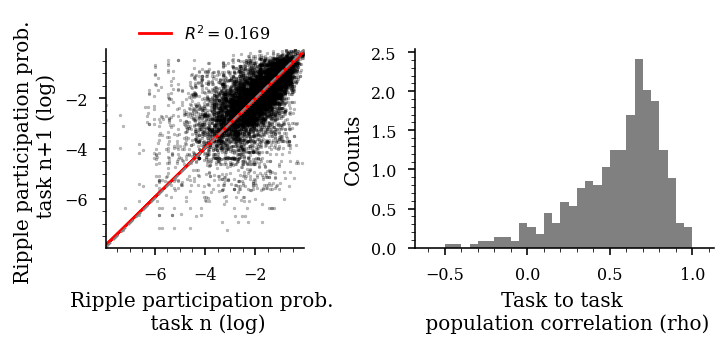

In [553]:
from matplotlib.ticker import AutoMinorLocator
from sklearn.linear_model import RANSACRegressor

fig, axs = plt.subplots(1,2, figsize=functions.set_size('thesis', fraction=1, subplots=(1,2)), edgecolor='k')
fig.subplots_adjust(hspace = 0.1, wspace=0.2)
axs = axs.ravel()

x1 = np.hstack(list(itertools.chain(*X1)))
x2 = np.hstack(list(itertools.chain(*X2)))

idx = (x1>0 ) & (x2>0)
x1 = np.log(x1[idx])
x2 = np.log(x2[idx])

reg = RANSACRegressor(random_state=0).fit(np.expand_dims(x1,axis=1), x2)
reg.score(np.expand_dims(x1,axis=1),x2)
reg.predict(np.expand_dims(x1,axis=1))

slope, intercept_, r_value, p_value, std_err_ = stats.linregress(x1,x2)

axs[0].scatter(x1,x2,s=2,color='k',alpha=.25,rasterized=True)
# axs[0].plot(x1,x1*slope+intercept_,color='r',label='$R^2=$'+str('%.3f'%(r_value)))
# axs[0].plot(x1,reg.predict(np.expand_dims(x1,axis=1)),color='r',label='$R^2=$'+str('%.3f'%(reg.score(np.expand_dims(x1,axis=1),x2))))
axs[0].plot(x1,x1*reg.estimator_.coef_+reg.estimator_.intercept_,
            color='r',
            label='$R^2=$'+str('%.3f'%(reg.score(np.expand_dims(x1,axis=1),x2))))

axs[0].set_xlim(np.array([x1,x2]).min(),np.array([x1,x2]).max())
axs[0].set_ylim(np.array([x1,x2]).min(),np.array([x1,x2]).max())
axs[0].plot([0, 1], [0, 1], transform=axs[0].transAxes,color='grey',ls='--',linewidth=1)

axs[0].set_xlabel('Ripple participation prob. \n task n (log)')
axs[0].set_ylabel('Ripple participation prob. \n task n+1 (log)')
axs[0].set_aspect('equal')

axs[1].hist(df_save.rho,bins=np.arange(-.6,1.1,.05),color='grey',density=True)
# bins = np.arange(-1,1,.05)
# axs[1].set_xlim(0,1)
axs[1].set_xlabel('Task to task \n pop. correlation (rho)')
axs[1].set_ylabel('Counts')

# axs[0].legend(frameon=False)
# axs[0].legend(loc='best',frameon=False)
axs[0].legend(bbox_to_anchor=(1, 0, -.1, 1.2),frameon=False)

for i in range(2):
    right_side = axs[i].spines["right"]
    right_side.set_visible(False)
    top_side = axs[i].spines["top"]
    top_side.set_visible(False)
    axs[i].xaxis.set_minor_locator(AutoMinorLocator())
    axs[i].yaxis.set_minor_locator(AutoMinorLocator())

plt.savefig(os.path.join(fig_save_path,'participation_epoch_stability_correlations.pdf'),dpi=300,bbox_inches='tight')
  
# for i, label in enumerate(('A','B', 'C', 'D','E')):
#     axs[i].text(-0.3, 1.15, label, transform=axs[i].transAxes,
#         fontsize=11, fontweight='normal', va='top', ha='right')

Z:\Data\Kenji\ec013.393_418


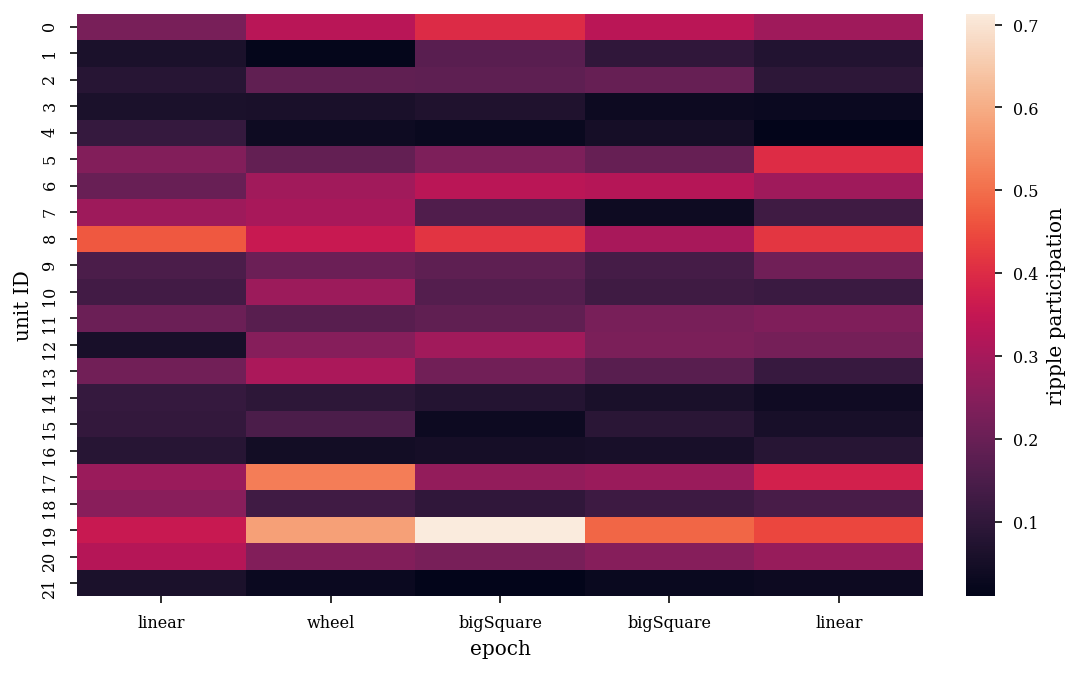

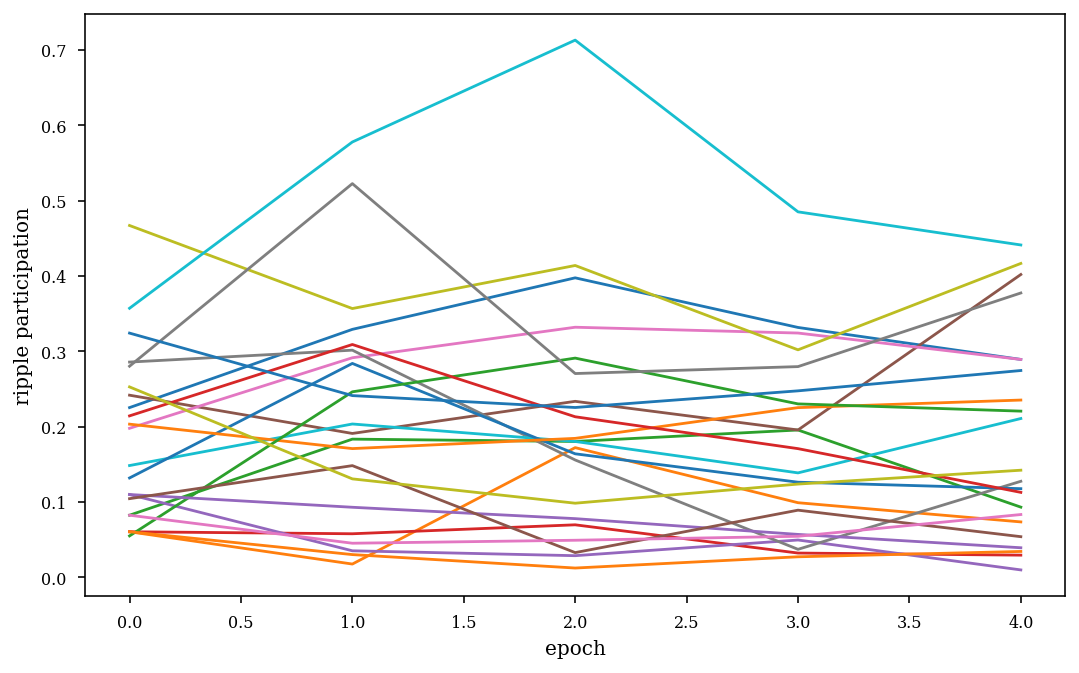

In [133]:
basepath = df[np.array(n_units)>=7].basepath.unique()[3]

print(basepath)
epoch_df = loading.load_epoch(basepath)

temp_df = df[df.basepath == basepath]
X = np.zeros([temp_df.epoch_n.unique().shape[0],temp_df.UID.unique().shape[0]])
for i,ep in enumerate(temp_df.epoch_n.unique()):
    X[i,:] = temp_df[temp_df.epoch_n == ep].participation_prob.values

epoch_name = [temp_df[temp_df.epoch_n == ep_n].epoch.unique()[0] for ep_n in temp_df.epoch_n.unique()]

X_df = pd.DataFrame(index = np.arange(X.shape[1]), columns = epoch_name)
X_df[:] = X.T

# plt.figure(figsize=(15,8))
plt.figure(figsize=functions.set_size('thesis', fraction=1.25, subplots=(1, 1)), edgecolor='k',constrained_layout=True)
sns.heatmap(X_df,cbar_kws={'label': 'ripple participation'})
plt.ylabel('unit ID')
plt.xlabel('epoch')   

plt.figure(figsize=functions.set_size('thesis', fraction=1.25, subplots=(1, 1)), edgecolor='k',constrained_layout=True)
plt.plot(X_df.values.T)
plt.ylabel('ripple participation')
plt.xlabel('epoch')
plt.show()

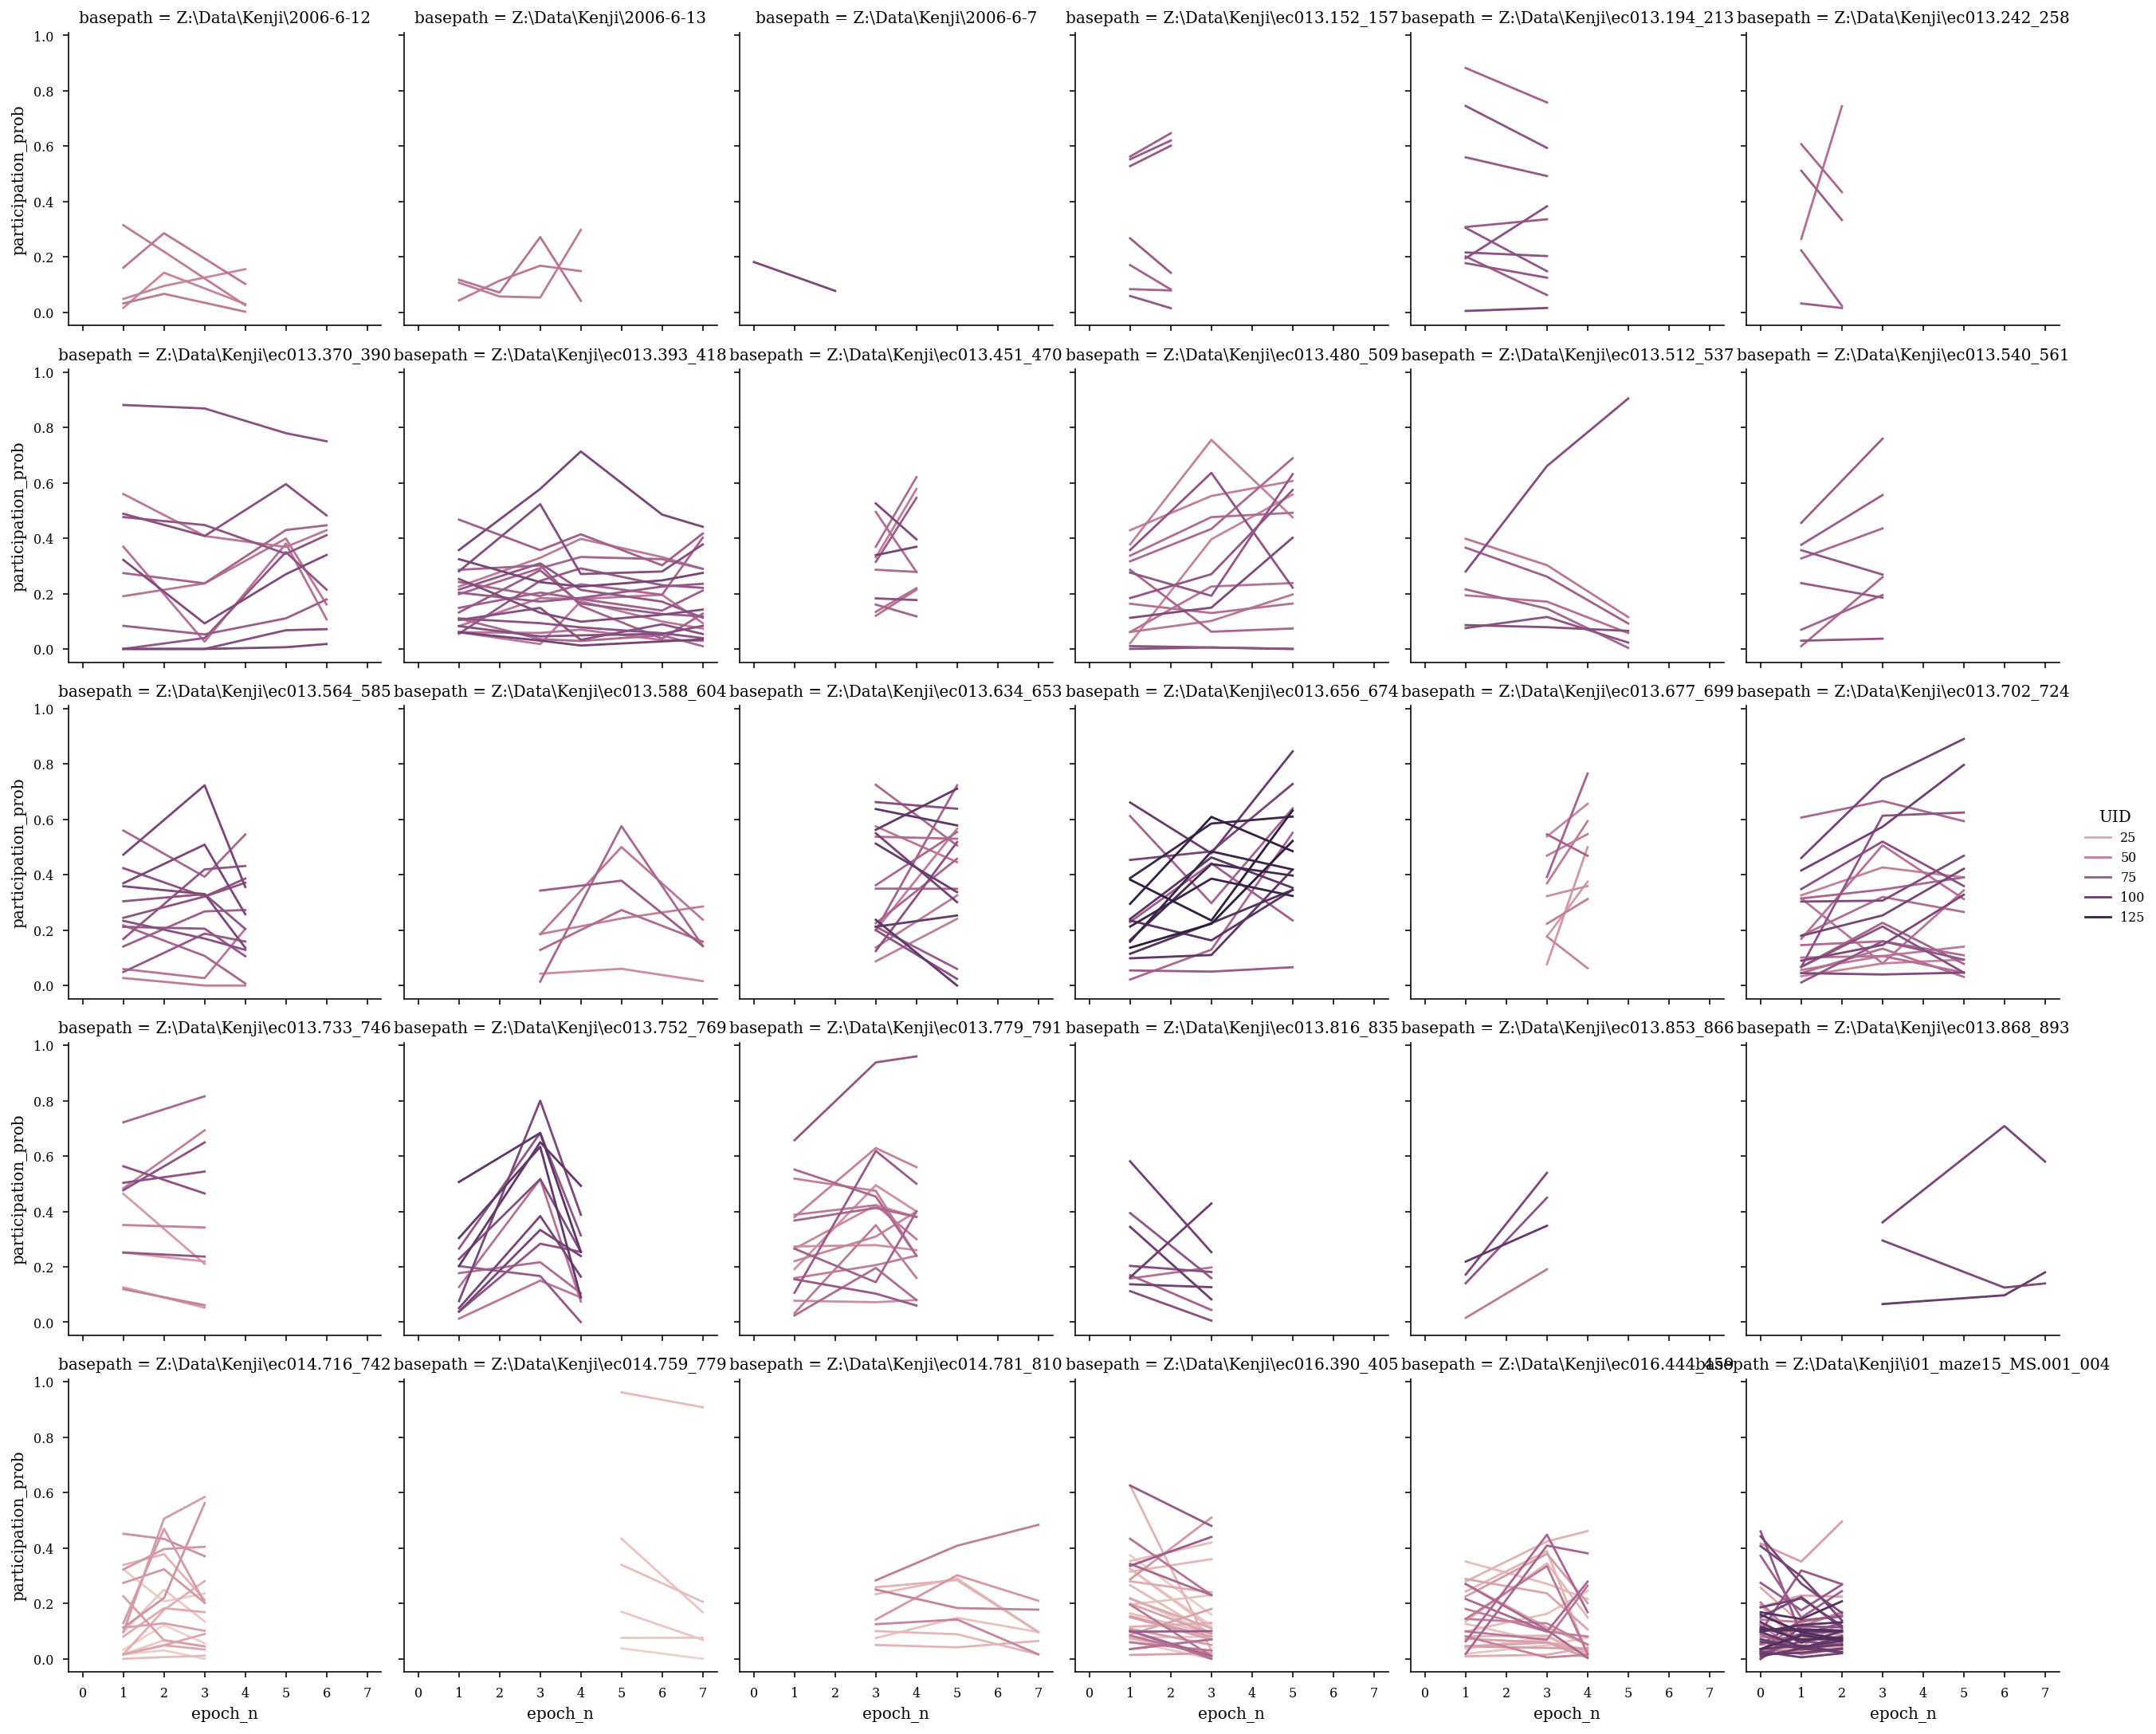

In [134]:
palette = sns.color_palette("rocket_r")

sns.relplot(
    data=df,
    x="epoch_n", y="participation_prob",
    kind="line", col="basepath",hue="UID",
    height=3, aspect=1,col_wrap=6
)